# Insight

Kaggle의 Netflix 데이터를 분석해보고 최신 컨텐츠 트렌드를 분석.<br>
더 나아가서 여러 유사 데이터중에 떠오르는 경쟁사이고 분석해볼만한 데이터인 Disney 데이터와 비교해보고 더 나은 플랫폼에서 지정해놓은 <br>페르소나에게 컨텐츠 기반의 추천시스템을 적용해봅니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
!pip install squarify

# Netflix vs Disney

## 필요한 라이브러리 import

In [55]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import missingno as msno
from scipy.stats import norm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## 데이터 불러오기

In [57]:
# Netflix
netflix_df = pd.read_csv('/content/drive/MyDrive/Project/AIFFEL/Datathon/data/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [58]:
# Disney
disney_df = pd.read_csv('/content/drive/MyDrive/Project/AIFFEL/Datathon/data/disney_plus_titles.csv')
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


## 데이터 살펴보기

In [59]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [60]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [61]:
# missing values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [62]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [63]:
disney_df.nunique()

show_id         1450
type               2
title           1450
director         609
cast            1193
country           89
date_added       167
release_year      90
rating             9
duration         158
listed_in        329
description     1448
dtype: int64

In [64]:
disney_df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

Disney 데이터가 Netflix 보다 많이 적음<br>
Disney, Netflix 모두 director, cast 결측치 많음

## 데이터 전처리

### rating 처리

In [65]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [66]:
netflix_df[netflix_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [85]:
disney_df['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y',
       'TV-Y7-FV'], dtype=object)

In [86]:
disney_df[disney_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
276,s277,Movie,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,"March 19, 2021",2019,NaN,53 min,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...
280,s281,TV Show,Marvel Studios ASSEMBLED,NaN,NaN,NaN,"March 12, 2021",2021,NaN,1 Season,"Anthology, Docuseries",ASSEMBLED is an immersive series of docu-speci...


In [87]:
disney_df = disney_df[disney_df['rating'].notna()]
disney_df['rating'].isna().sum()

0

### duration 처리

In [67]:
netflix_df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [68]:
netflix_df[netflix_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [69]:
# 'rating'에 있는 '74 min', '84 min', '66 min'은 'duration' 으로 옮기기
netflix_df.loc[5541,'duration'] = '74 min' 
netflix_df.loc[5541,'rating'] = np.nan 

netflix_df.loc[5794,'duration'] = '84 min'
netflix_df.loc[5794,'rating'] = np.nan

netflix_df.loc[5813,'duration'] = '66 min'
netflix_df.loc[5813,'rating'] = np.nan

In [88]:
disney_df['duration'].unique()

array(['23 min', '91 min', '41 min', '94 min', '1 Season', '2 Seasons',
       '45 min', '59 min', '4 min', '10 Seasons', '2 min', '1 min',
       '8 min', '3 Seasons', '110 min', '11 min', '7 min', '95 min',
       '129 min', '14 min', '5 min', '134 min', '9 min', '30 min',
       '6 min', '22 min', '3 min', '87 min', '90 min', '93 min',
       '101 min', '132 min', '44 min', '131 min', '104 min', '5 Seasons',
       '52 min', '47 min', '53 min', '85 min', '92 min', '135 min',
       '4 Seasons', '105 min', '99 min', '32 Seasons', '88 min',
       '127 min', '106 min', '116 min', '42 min', '16 Seasons', '140 min',
       '19 Seasons', '66 min', '115 min', '137 min', '9 Seasons',
       '126 min', '82 min', '125 min', '54 min', '7 Seasons', '98 min',
       '102 min', '80 min', '170 min', '97 min', '112 min', '21 min',
       '20 min', '15 min', '19 min', '79 min', '6 Seasons', '89 min',
       '18 min', '81 min', '148 min', '121 min', '96 min', '109 min',
       '107 min', '86 min', '

### director & cast 처리

In [70]:
# 결측치가 너무 많기 때문에 일단 제거함
netflix_df = netflix_df.drop(['director', 'cast'], axis=1)
netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [89]:
disney_df = disney_df.drop(['director','cast'], axis=1)
disney_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### date_added 처리

In [71]:
netflix_df[netflix_df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [72]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]
netflix_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


date_added 의 결측치 제거

In [90]:
disney_df[disney_df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1439,s1440,TV Show,Disney Kirby Buckets,United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [91]:
disney_df = disney_df[disney_df['date_added'].notna()]
disney_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


### country 처리

In [73]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [92]:
disney_df['country'] = disney_df['country'].fillna(disney_df['country'].mode()[0])
disney_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [74]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

In [93]:
disney_df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### year_added, month_added 생성

year과 month 값을 `date_added`로 부터 추출

In [75]:
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x:x.split(" ")[-1])
netflix_df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [76]:
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x:x.split(" ")[0])
netflix_df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [77]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [94]:
disney_df['year_added'] = disney_df['date_added'].apply(lambda x:x.split(" ")[-1])
disney_df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
5    2021
Name: year_added, dtype: object

In [95]:
disney_df['month_added'] = disney_df['date_added'].apply(lambda x:x.split(" ")[0])
disney_df['month_added'].head()

0    November
1    November
2    November
3    November
5    November
Name: month_added, dtype: object

In [96]:
disney_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,November
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,November
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,November


### rating 을 기준으로 TV 타겟층 생성

Amazon에서 제공하는 [등급 정보](https://www.amazon.com/gp/help/customer/display.html?nodeId=G2C2CPZWGZWHZ42J)를 기준으로 다음과 같이 치환

In [78]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [79]:
netflix_df['target_ages'] = netflix_df['rating'].replace(rating_ages)
netflix_df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', nan], dtype=object)

In [80]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults


In [98]:
disney_df['target_ages'] = disney_df['rating'].replace(rating_ages)
disney_df['target_ages'].unique()

array(['Kids', 'Older Kids', 'Teens'], dtype=object)

In [99]:
disney_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,November,Kids
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November,Older Kids
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,November,Kids
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November,Older Kids
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,November,Teens


In [81]:
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x:x.split(",")[0])
netflix_df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

In [100]:
disney_df['principal_country'] = disney_df['country'].apply(lambda x:x.split(",")[0])
disney_df['principal_country'].head()

0    United States
1    United States
2    United States
3    United States
5    United States
Name: principal_country, dtype: object

### data type

In [82]:
netflix_df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [83]:
# type - category
netflix_df['type'] = pd.Categorical(netflix_df['type'])
# target_ages - category (4 classes)
netflix_df['target_ages'] = pd.Categorical(netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#year added - integer
netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

In [84]:
netflix_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

In [101]:
disney_df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [102]:
# type - category
disney_df['type'] = pd.Categorical(disney_df['type'])
# target_ages - category
disney_df['target_ages'] = pd.Categorical(disney_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# year_added - integer
disney_df['year_added'] = pd.to_numeric(disney_df['year_added'])

In [103]:
disney_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

## 데이터 시각화 - Comparison of Netflix and Disney

### Contents Type

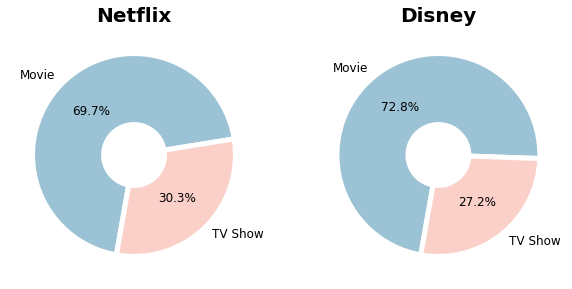

In [104]:
labels = ['Movie', 'TV Show']
colors = ['#9CC3D5FF', '#FAD0C9FF']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth' : 5}
textprops={'fontsize':12, 'fontweight':'light'}

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].pie(netflix_df['type'].value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops=textprops)
axs[0].set_title('Netflix', fontsize=20, fontweight='bold')
axs[1].pie(disney_df['type'].value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops=textprops)
axs[1].set_title('Disney', fontsize=20, fontweight='bold')

plt.show()

Disney 보다 Netflix의 TV Show 비율이 더 높음

### Rating Distribution

In [105]:
def generate_rating_df(netflix_df):
  rating_df = netflix_df.groupby(['rating', 'target_ages']).agg({'show_id':'count'}).reset_index()
  rating_df = rating_df[rating_df['show_id'] != 0]
  rating_df.columns = ['rating', 'target_ages', 'counts']
  rating_df = rating_df.sort_values('target_ages')
  return rating_df

In [106]:
custom_template = {
    "layout": go.Layout(
        font={
            "family": "Lato",
            "size": 12,
            "color": "#707070",
        },
        title={
            "font": {
                "family": "Lato",
                "size": 20,
                "color": "#000000",
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
    )
}

In [107]:
def format_title(title, subtitle=None, subtitle_font_size=14):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [108]:
rating_df = generate_rating_df(netflix_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', 
             title=format_title("Netflix Rating", 'grouped by target ages'), template=custom_template)

fig.show()

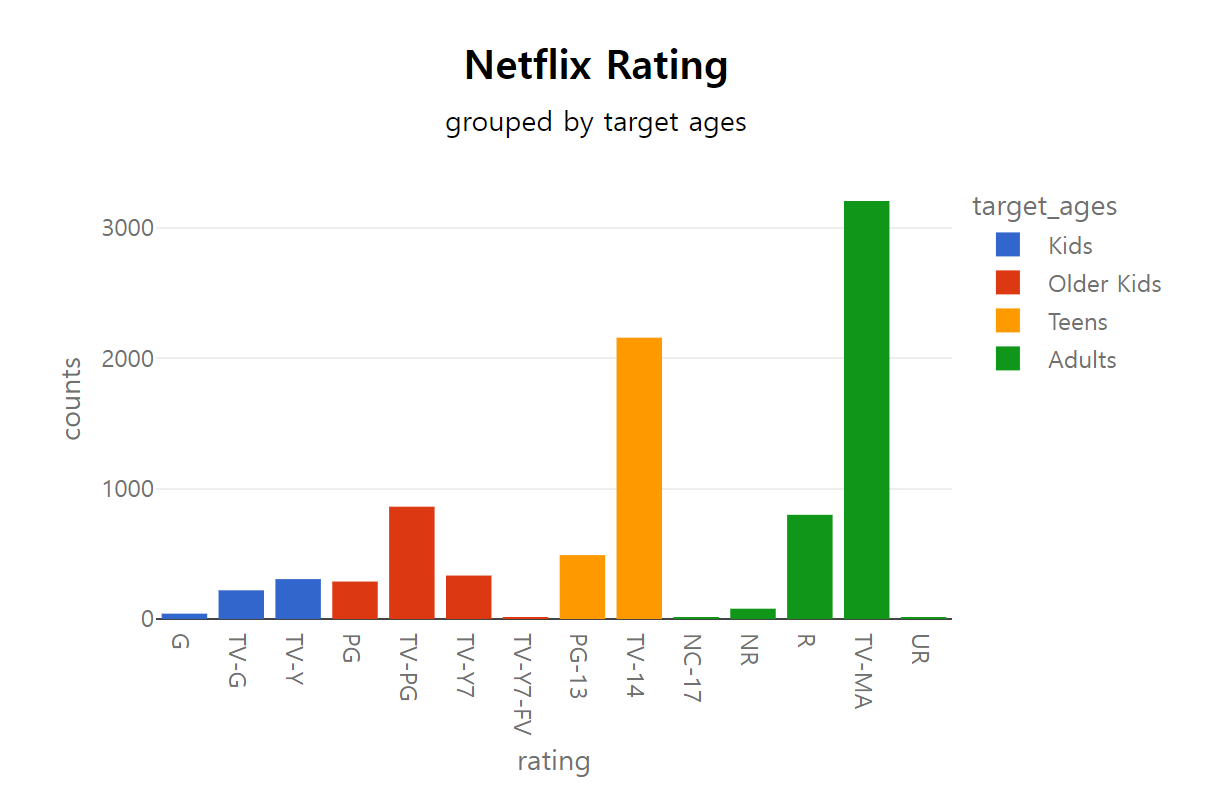

In [109]:
rating_df = generate_rating_df(disney_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', 
             title=format_title("Disney Rating", 'grouped by target ages'), template=custom_template)

fig.show()

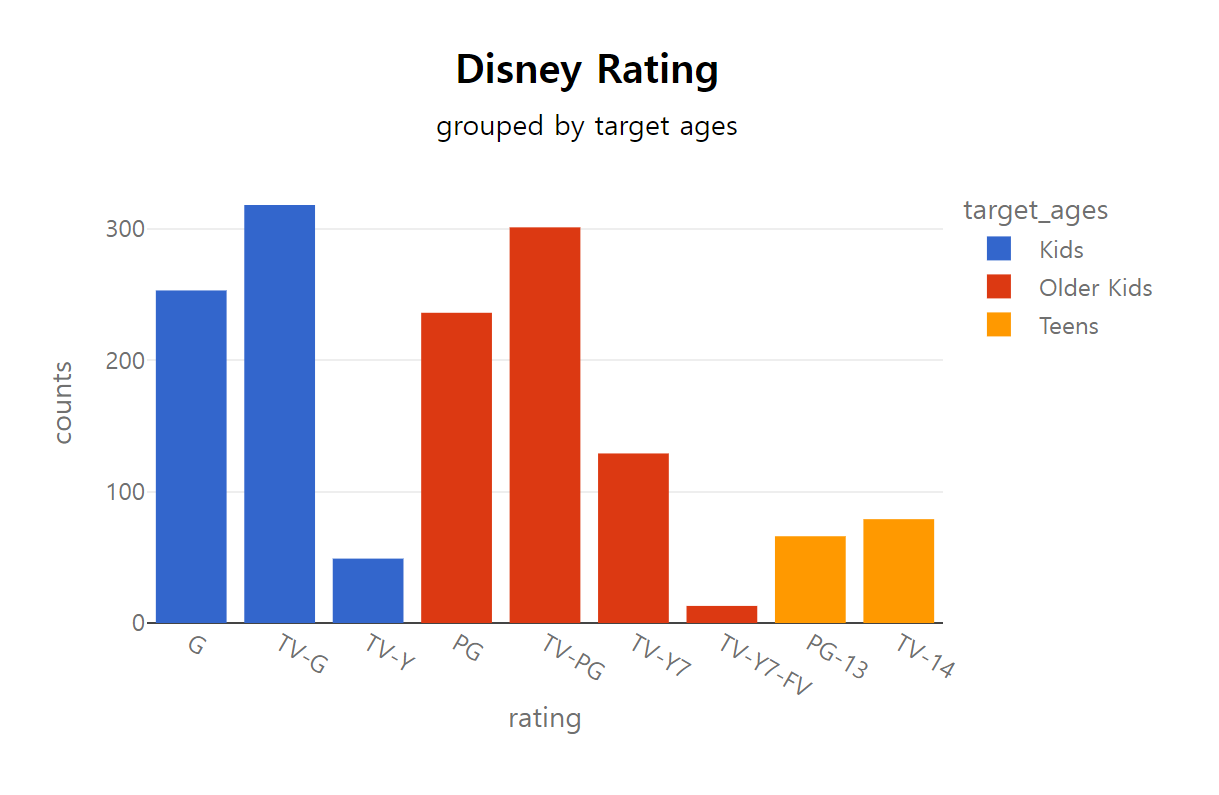

Disney 는 최대 청소년까지 보유하고 있고 대부분 아이용 컨텐츠<br>
Netflix 는 아이부터 성인까지 분포가 다양하며 특히 성인용 컨텐츠 수가 많음

### Country

In [110]:
year_country1 = netflix_df.groupby('year_added')['principal_country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country1, locations='principal_country', color='counts',
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                    )

fig.update_layout(title=format_title('Netflix Comparison by country'))

fig.show()

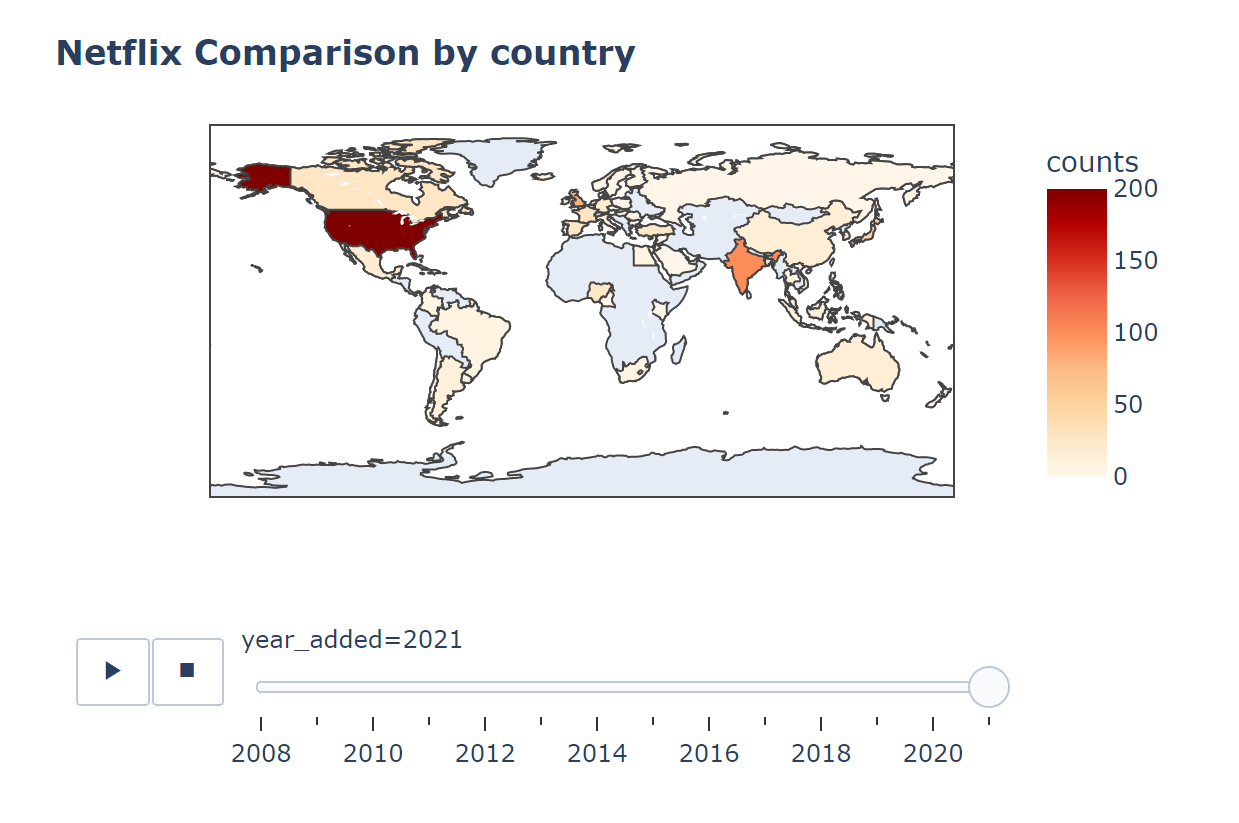

미국, 인도의 확연한 밀집

In [111]:
year_country2 = disney_df.groupby('year_added')['principal_country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations='principal_country', color='counts',
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                    )

fig.update_layout(title=format_title('Disney Comparison by country'))

fig.show()

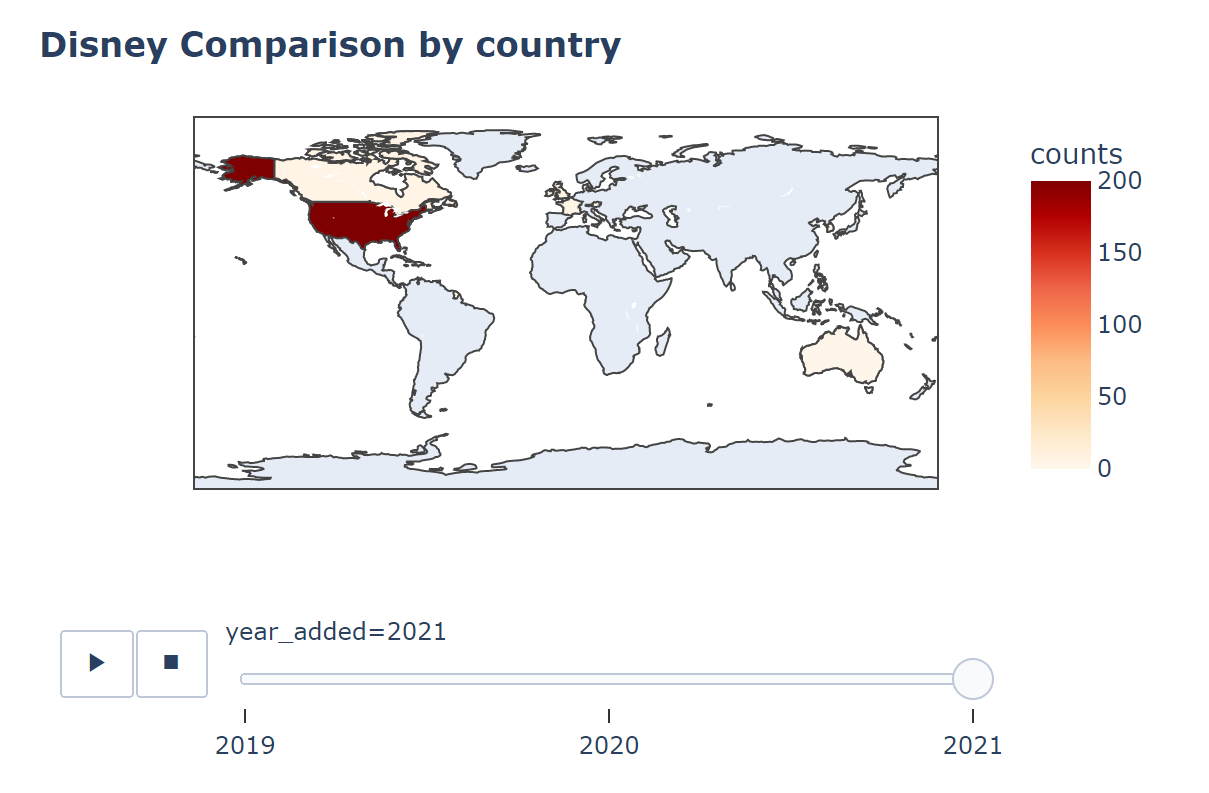

Disney 역시 미국이!

In [112]:
country_count=netflix_df['principal_country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:10]
topcountries

,principal_country
United States,4035
India,1008
United Kingdom,627
Canada,271
Japan,258
France,212
South Korea,211
Spain,181
Mexico,134
Australia,116


In [113]:
data = dict(
    number=[4035, 1008, 627, 271, 258, 212, 211, 181, 134, 116],
    countries=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])
fig = px.funnel(data, x='number', y='countries')
fig.update_layout(title=format_title('Netflix top 10 producing countries'))
fig.show()

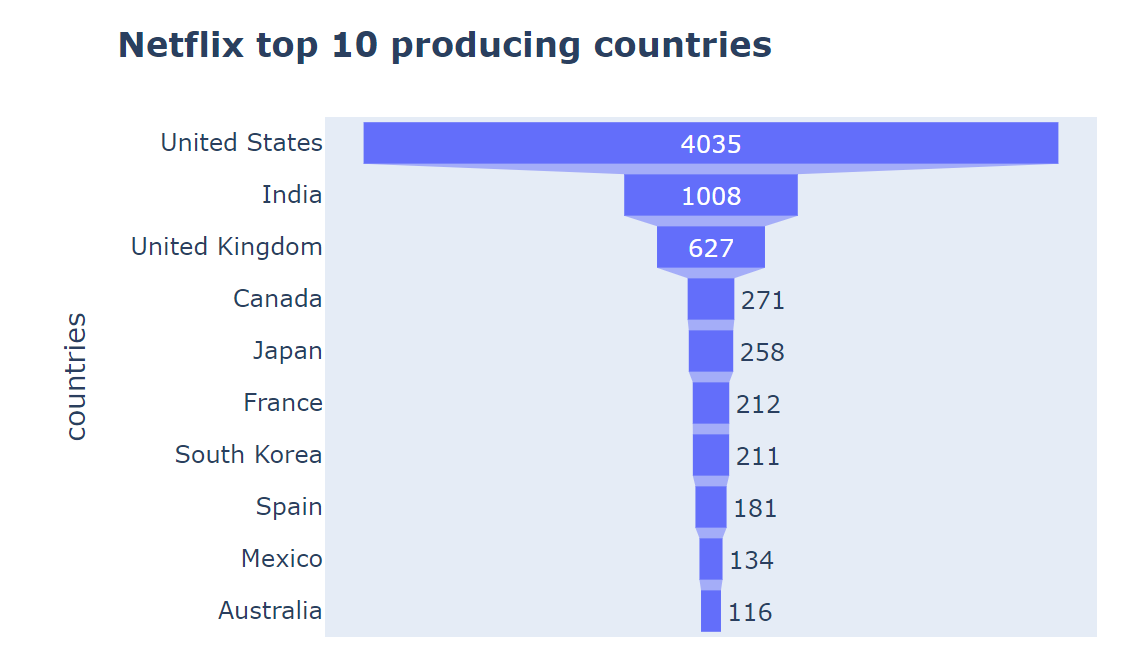

미국과 인도 다음으로 우리나라도 나름 순위권에 든다.

In [114]:
country_count=disney_df['principal_country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:10]
topcountries

,principal_country
United States,1335
United Kingdom,50
Canada,25
France,10
Australia,4
Argentina,3
Ireland,3
Germany,2
China,2
India,2


In [115]:
data2 = dict(
    number2=[1335, 50, 25, 10, 4, 3, 3, 2, 2, 2],
    countries2=['United States', 'United Kingdom', 'Canada', 'France', 'Australia', 'Argentina', 'Ireland', 'Germany', 'China', 'India'])
fig = px.funnel(data2, x='number2', y='countries2')
fig.update_layout(title=format_title('Disney top 10 producing countries'))
fig.show()

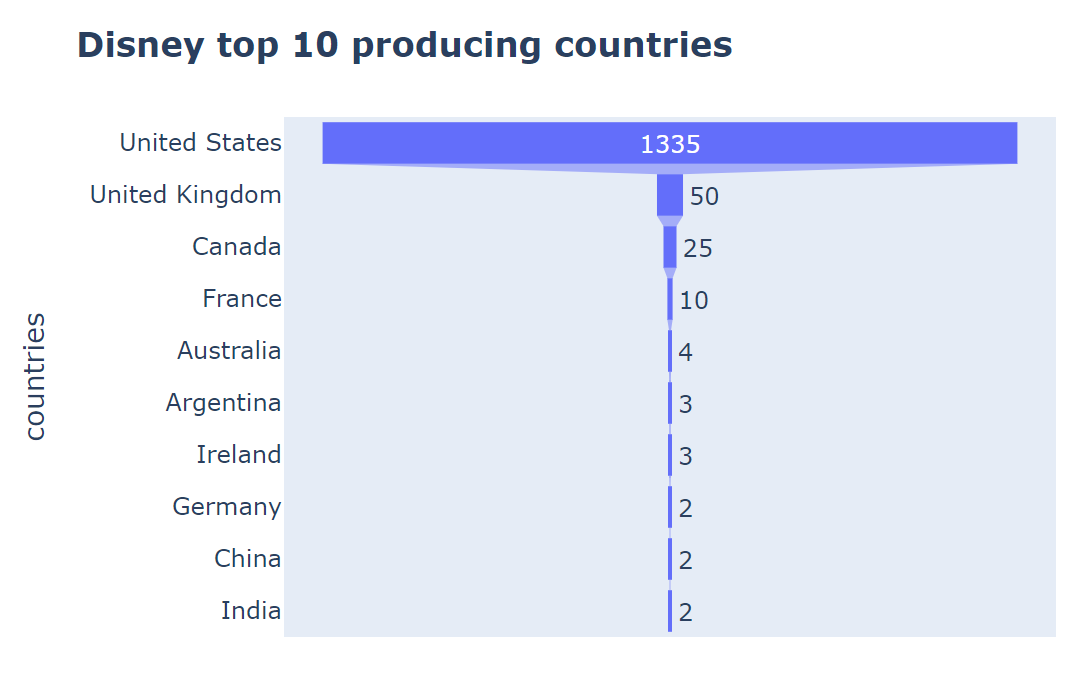

Disney 는 미국에 쏠려있는 반면 Netflix 는 나름 나라 별 분포되어있음<br>
둘 다 미국이 1위

### Distribution of content released

In [116]:
released_year_df = netflix_df.loc[netflix_df['release_year'] > 2000].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = netflix_df.loc[netflix_df['year_added'] > 2000].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(title=format_title('Netflix contents released over the years'), categoryorder='total descending')
fig.show()

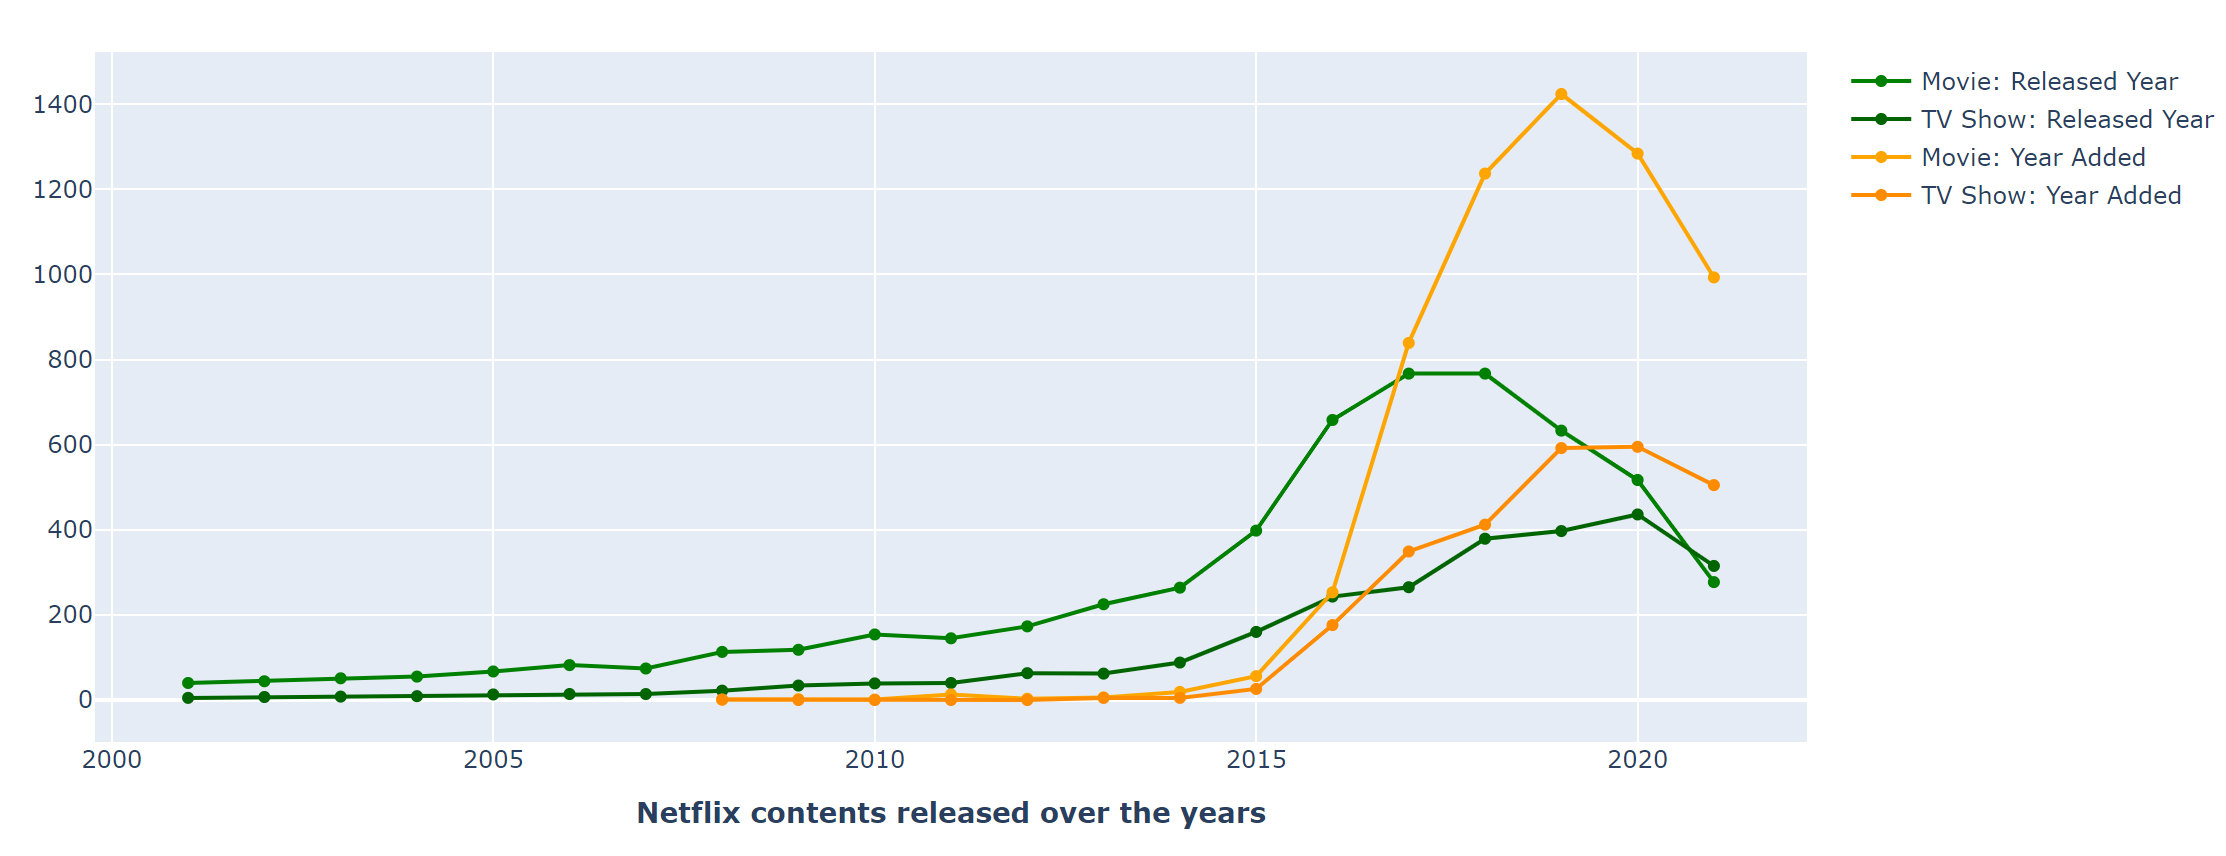

2016년을 기점으로 콘텐츠의 극대화<br>
2020년을 기점으로는 영화 콘텐츠보다 TV-show콘텐츠가 더 많이 제작됨을 알 수 가 있다.<br>
또 점점 떨어지는 추세는 아무래도 코로나의 영향으로 여러 작품이 원활히 나오지는 못하는 점을 추측해볼 수 도 있다.

In [117]:
released_year_df2 = disney_df.loc[disney_df['release_year'] > 2000].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df2 = disney_df.loc[disney_df['year_added'] > 2000].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df2.loc[released_year_df2['type'] == 'Movie']['release_year'], 
    y=released_year_df2.loc[released_year_df2['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df2.loc[released_year_df2['type'] == 'TV Show']['release_year'], 
    y=released_year_df2.loc[released_year_df2['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df2.loc[added_year_df2['type'] == 'Movie']['year_added'], 
    y=added_year_df2.loc[added_year_df2['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df2.loc[added_year_df2['type'] == 'TV Show']['year_added'], 
    y=added_year_df2.loc[added_year_df2['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(title=format_title('Disney contents released over the years'), categoryorder='total descending')
fig.show()

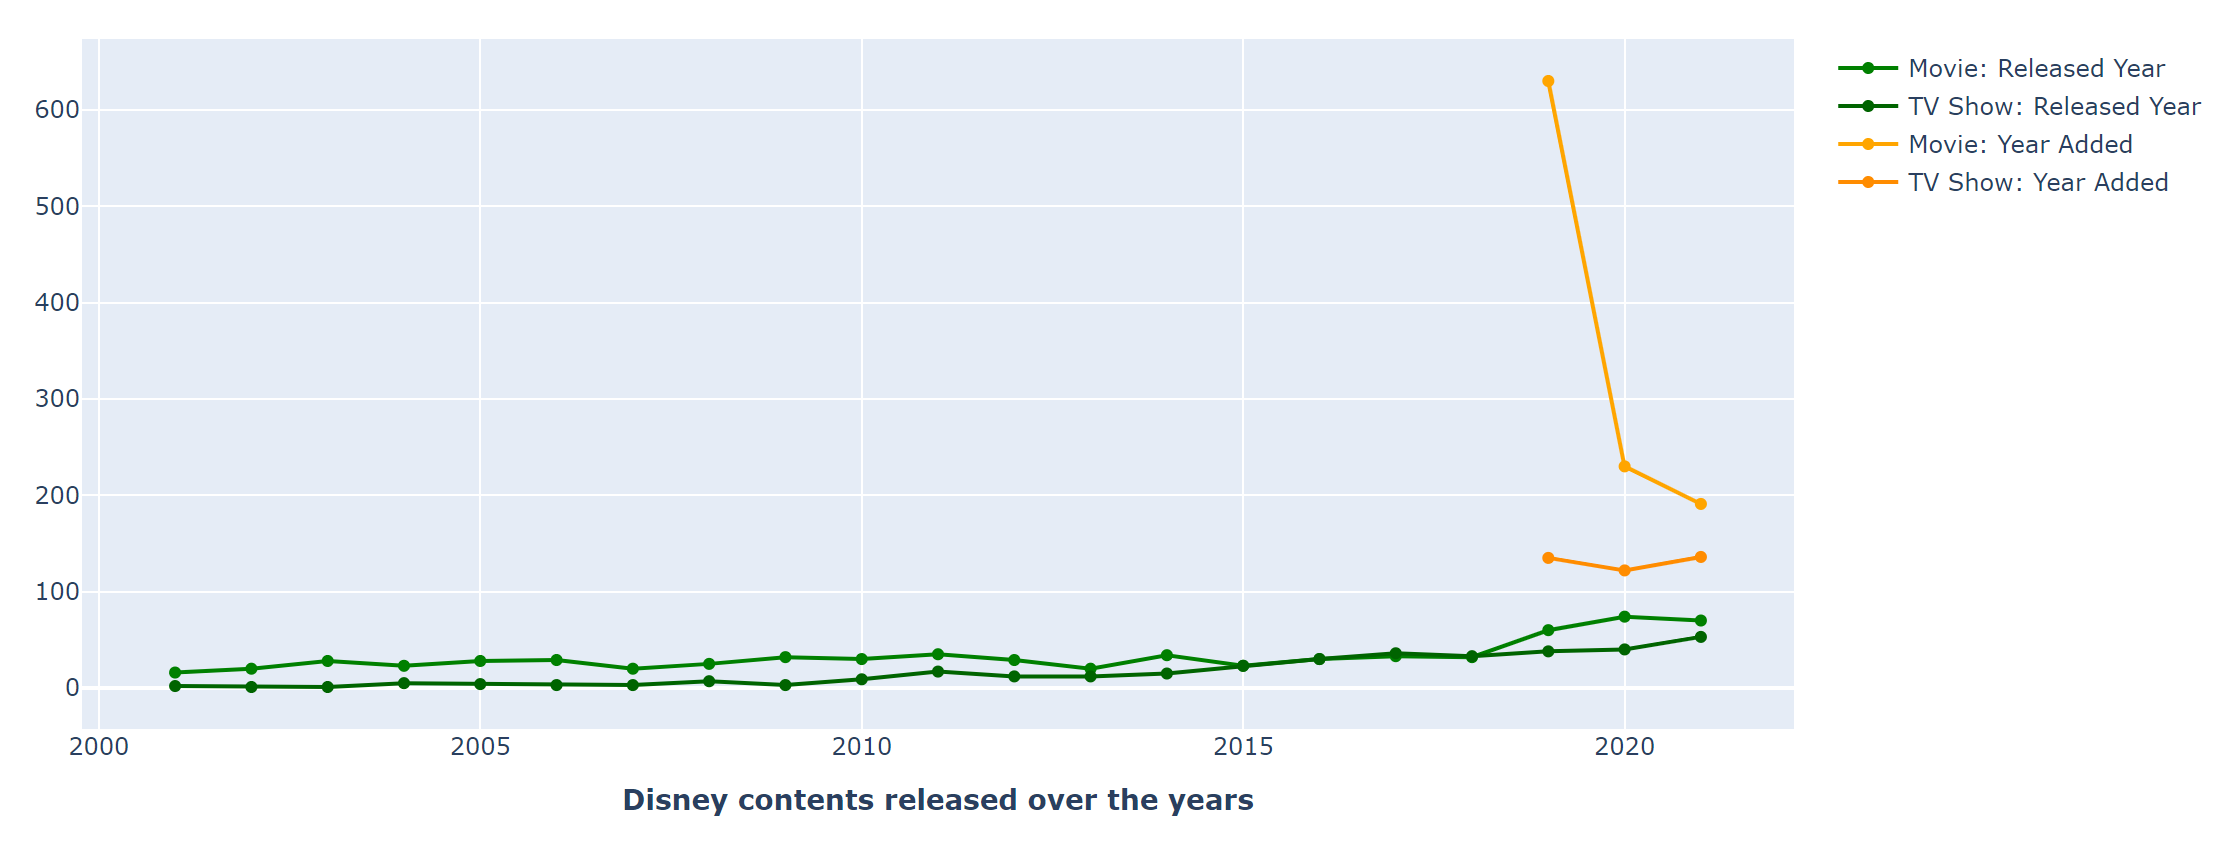

Disney의 경우는 일정하게 유지하며 이 역시도 2020년 기점으로 TV-show가 상승 곡선을 띄는 모습을 보인다.

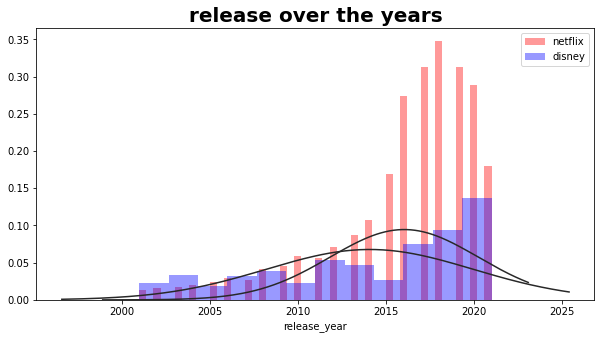

In [118]:
plt.figure(figsize=(10, 5))
sns.distplot(netflix_df.loc[netflix_df['release_year'] > 2000, 'release_year'], fit=norm, kde=False, color='red', label='netflix')
sns.distplot(disney_df.loc[disney_df['release_year'] > 2000, 'release_year'], fit=norm, kde=False, color='blue', label='disney')

plt.title('release over the years', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

전반적으로 릴리즈되는 컨텐츠가 늘어난 경향을 보인다.

### Duration

In [119]:
netflix_movie_df = netflix_df[netflix_df['type'] == 'Movie']
netflix_show_df = netflix_df[netflix_df['type'] == 'TV Show']

disney_movie_df = disney_df[disney_df['type'] == 'Movie']
disney_show_df = disney_df[disney_df['type'] == 'TV Show']

In [120]:
fig = px.histogram(x=netflix_show_df['duration'])
fig.update_xaxes(categoryorder = 'total descending')
fig.update_layout(title=format_title("Netflix distribution of shows duration"),
                  xaxis_title='Duration of the Show')

fig.show()

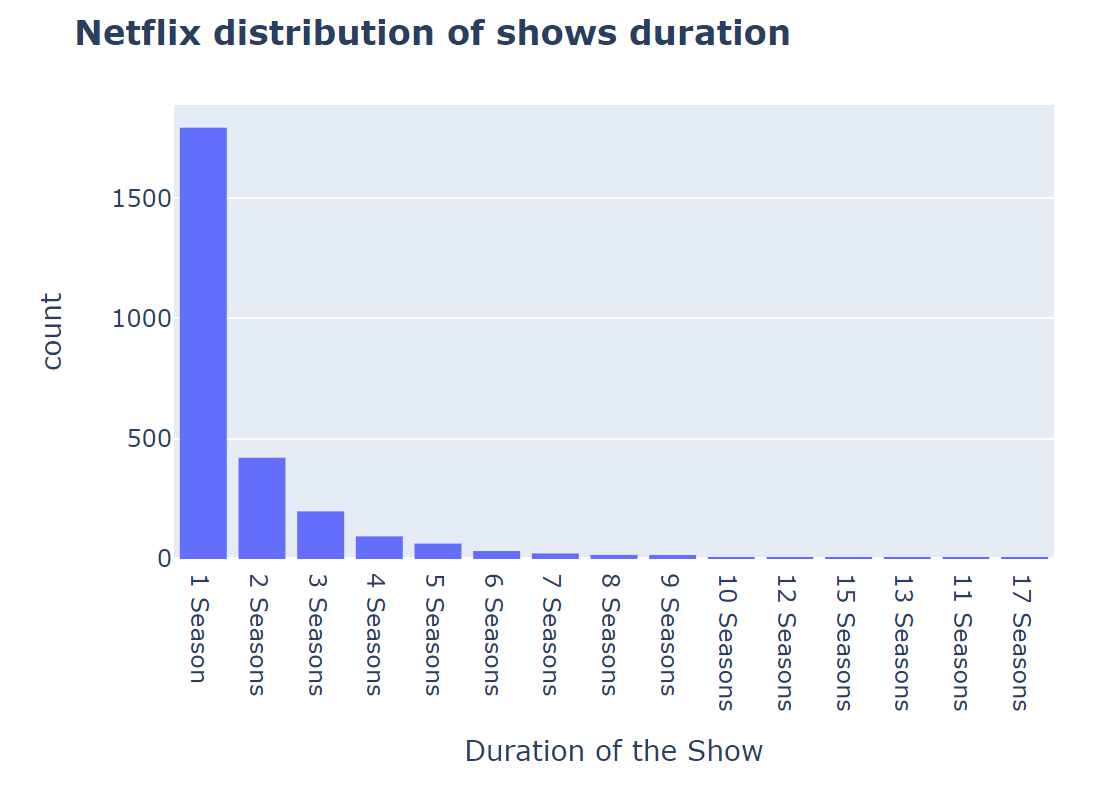

In [121]:
fig = px.histogram(x=disney_show_df['duration'])
fig.update_xaxes(categoryorder = 'total descending')
fig.update_layout(title=format_title("Disney distribution of shows duration"),
                  xaxis_title='Duration of the Show')

fig.show()

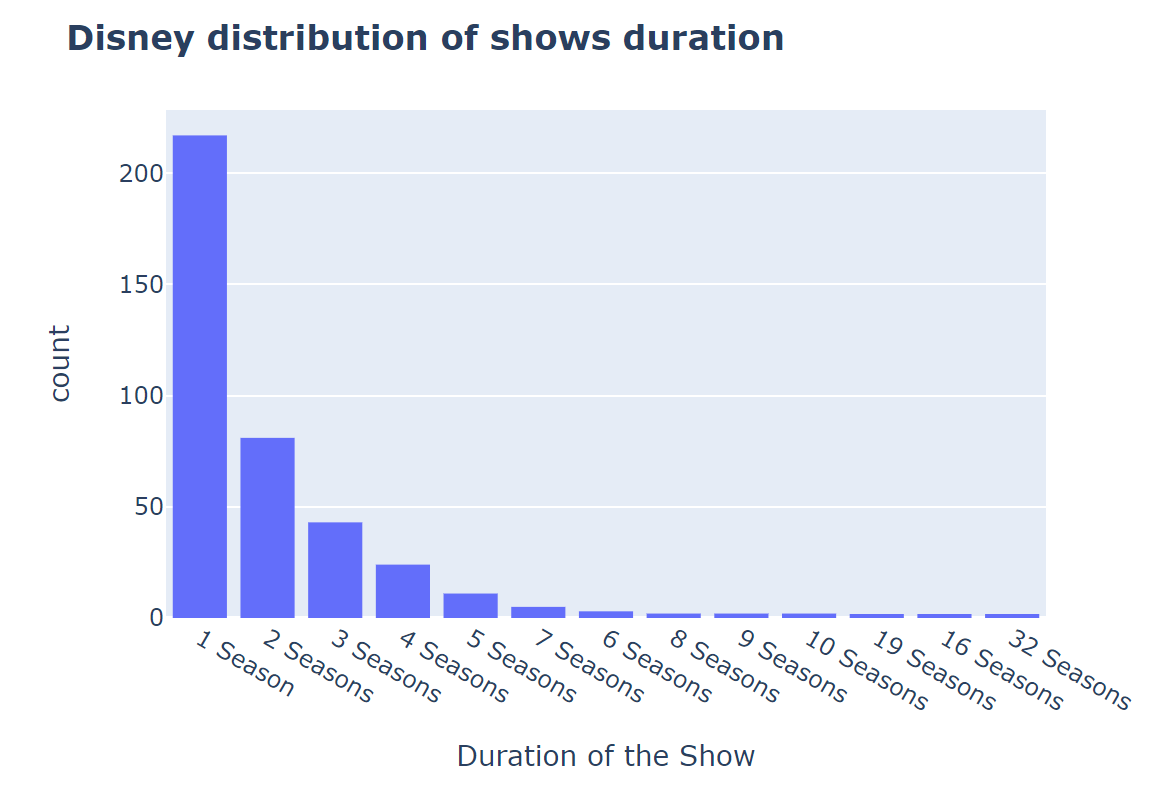

TV Show의 경우 Disney, Netflix 모두 season 1개가 대부분

In [122]:
netflix_temp_duration = netflix_movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))
disney_temp_duration = disney_movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

In [123]:
netflix_movie_df.loc[netflix_temp_duration.loc[netflix_temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hrs'
netflix_movie_df.loc[netflix_temp_duration.loc[(netflix_temp_duration >= 90)
 & (netflix_temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hrs'
netflix_movie_df.loc[netflix_temp_duration.loc[netflix_temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hrs'

In [124]:
netflix_movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,duration_bin
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States,More than 1.30 - less than 2.30 hrs
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids,United States,More than 1.30 - less than 2.30 hrs
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults,United States,More than 1.30 - less than 2.30 hrs
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens,United States,More than 1.30 - less than 2.30 hrs
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults,Germany,More than 1.30 - less than 2.30 hrs


In [125]:
disney_movie_df.loc[disney_temp_duration.loc[disney_temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hrs'
disney_movie_df.loc[disney_temp_duration.loc[(disney_temp_duration >= 90)
 & (disney_temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hrs'
disney_movie_df.loc[disney_temp_duration.loc[disney_temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hrs'

In [126]:
disney_movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,duration_bin
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,November,Kids,United States,Less than 1.30 hrs
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November,Older Kids,United States,More than 1.30 - less than 2.30 hrs
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,November,Kids,United States,Less than 1.30 hrs
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November,Older Kids,United States,Less than 1.30 hrs
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,November,Teens,United States,More than 1.30 - less than 2.30 hrs


In [127]:
fig = px.histogram(x=netflix_movie_df['duration_bin'], color=netflix_movie_df['duration_bin'])
fig.update_xaxes(categoryorder = 'array',
                 categoryarray = ['Less than 1.30 hrs', 'More than 1.30 - less than 2.30 hrs', 'More than 2.30 hrs'])
fig.update_layout(
    title=format_title('Netlfix distribution of movies duration'),
    xaxis_title='Duration of the Movies'
)

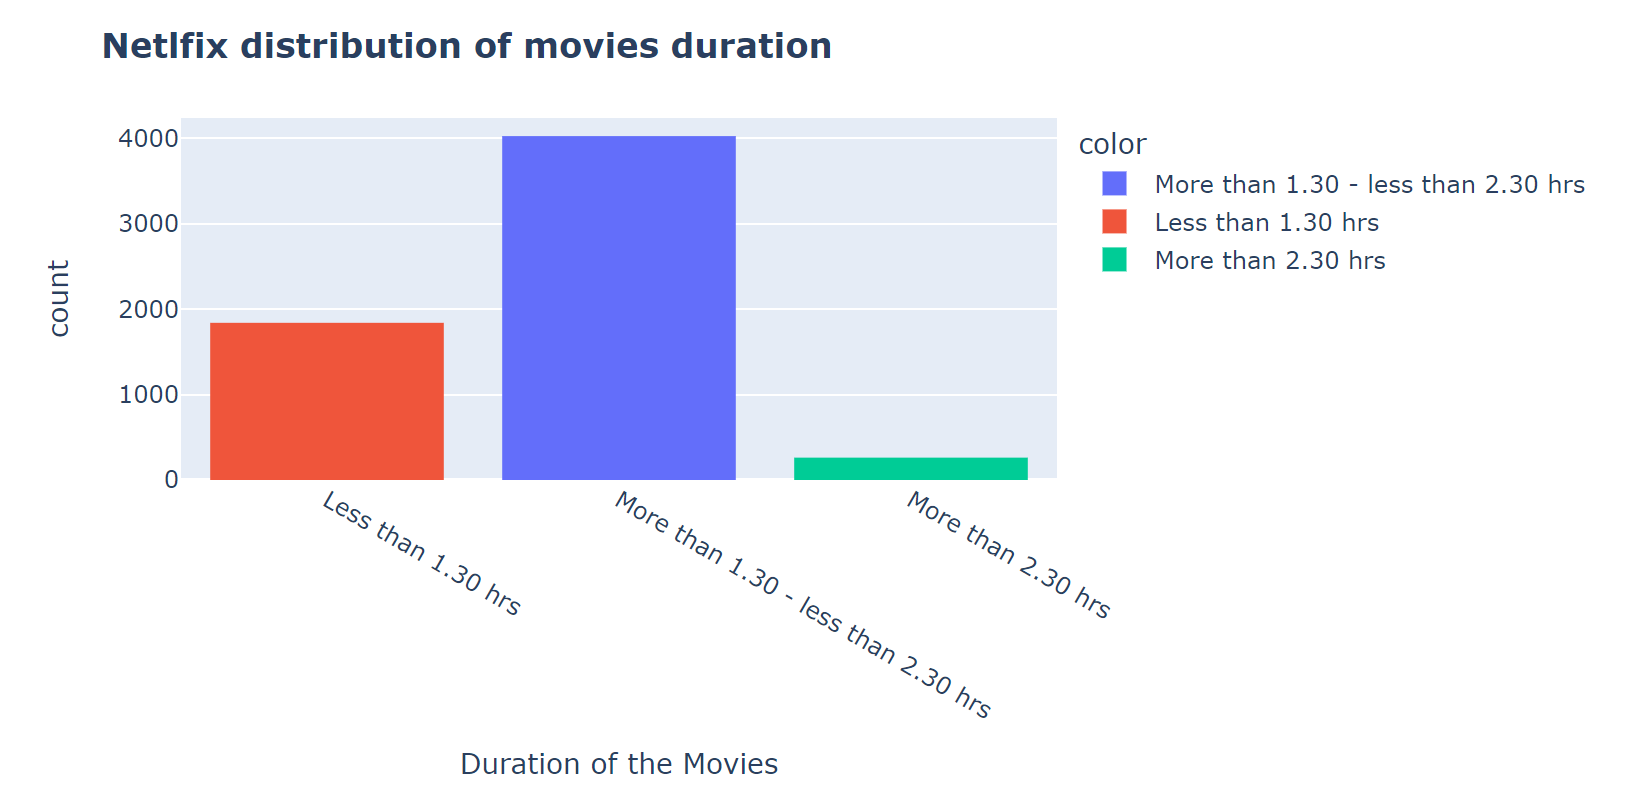

In [128]:
fig = px.histogram(x=disney_movie_df['duration_bin'], color=disney_movie_df['duration_bin'])
fig.update_xaxes(categoryorder = 'array',
                 categoryarray = ['Less than 1.30 hrs', 'More than 1.30 - less than 2.30 hrs', 'More than 2.30 hrs'])
fig.update_layout(
    title=format_title('Disney distribution of movies duration'),
    xaxis_title='Duration of the Movies'
)

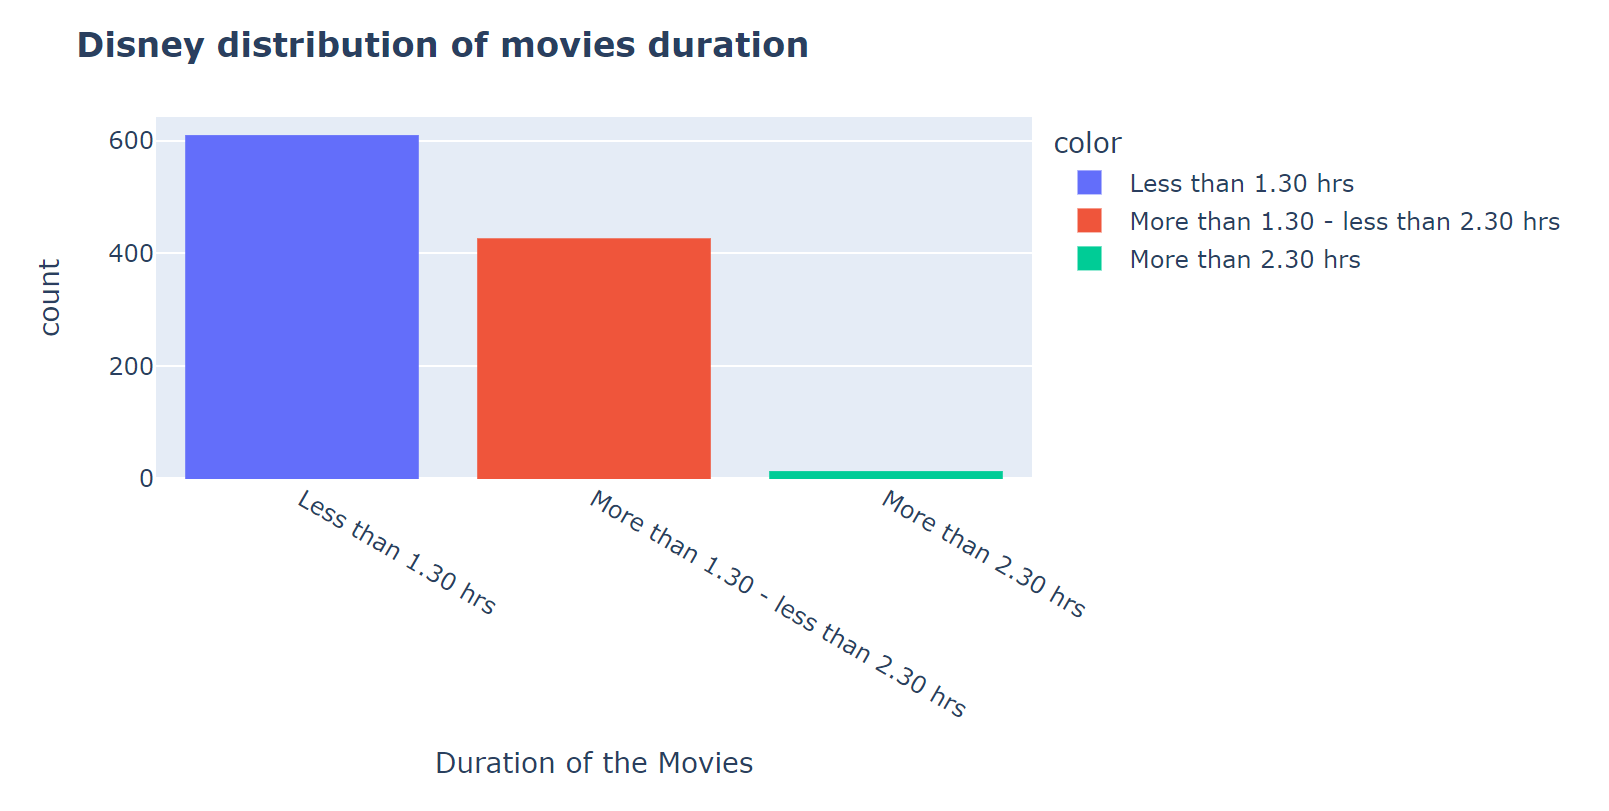

Movie의 경우 Disney 는 짧은 영화의 비율이 더 많은 반면 Netflix 는 1시간 30분에서 2시간 30분 정도 적절한 running time의 영화 비율이 높음<br> => Disney는 아이를, Netflix는 성인을 위한 컨텐츠 비율이 더 높기 때문에 그렇지 않을까?

### Genre

In [129]:
netflix_movie_df['genre'] = netflix_movie_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))
netflix_show_df['genre'] = netflix_show_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))

display(netflix_movie_df['genre'].head())
display(netflix_show_df['genre'].head())

0                                       [Documentaries]
6                            [Children & Family Movies]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
Name: genre, dtype: object

1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
5                 [TV Dramas, TV Horror, TV Mysteries]
Name: genre, dtype: object

In [130]:
disney_movie_df['genre'] = disney_movie_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))
disney_show_df['genre'] = disney_show_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))

display(disney_movie_df['genre'].head())
display(disney_show_df['genre'].head())

0            [Animation, Family]
1                       [Comedy]
2    [Animation, Comedy, Family]
3                      [Musical]
5    [Biographical, Documentary]
Name: genre, dtype: object

6                        [Action-Adventure, Superhero]
7                      [Docuseries, Reality, Survival]
8               [Animals & Nature, Docuseries, Family]
13    [Action-Adventure, Animals & Nature, Docuseries]
17                                   [Animation, Kids]
Name: genre, dtype: object

In [131]:
from sklearn.preprocessing import MultiLabelBinarizer

def calculate_mlb(series):
  mlb = MultiLabelBinarizer()
  mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
  return mlb_df

def top_genres(df, title='Tope ones'):
  genres_df = calculate_mlb(df['genre'])
  tdata = genres_df.sum().sort_values(ascending=False)

  fig = go.Figure()
  fig.add_trace(go.Bar(
      x=tdata.index,
      y=tdata.values,
  ))
  fig.update_xaxes(categoryorder='total descending')
  fig.update_layout(title=format_title(title))
  fig.show()

In [132]:
top_genres(netflix_movie_df, title='Netflix Top Movies Genre')

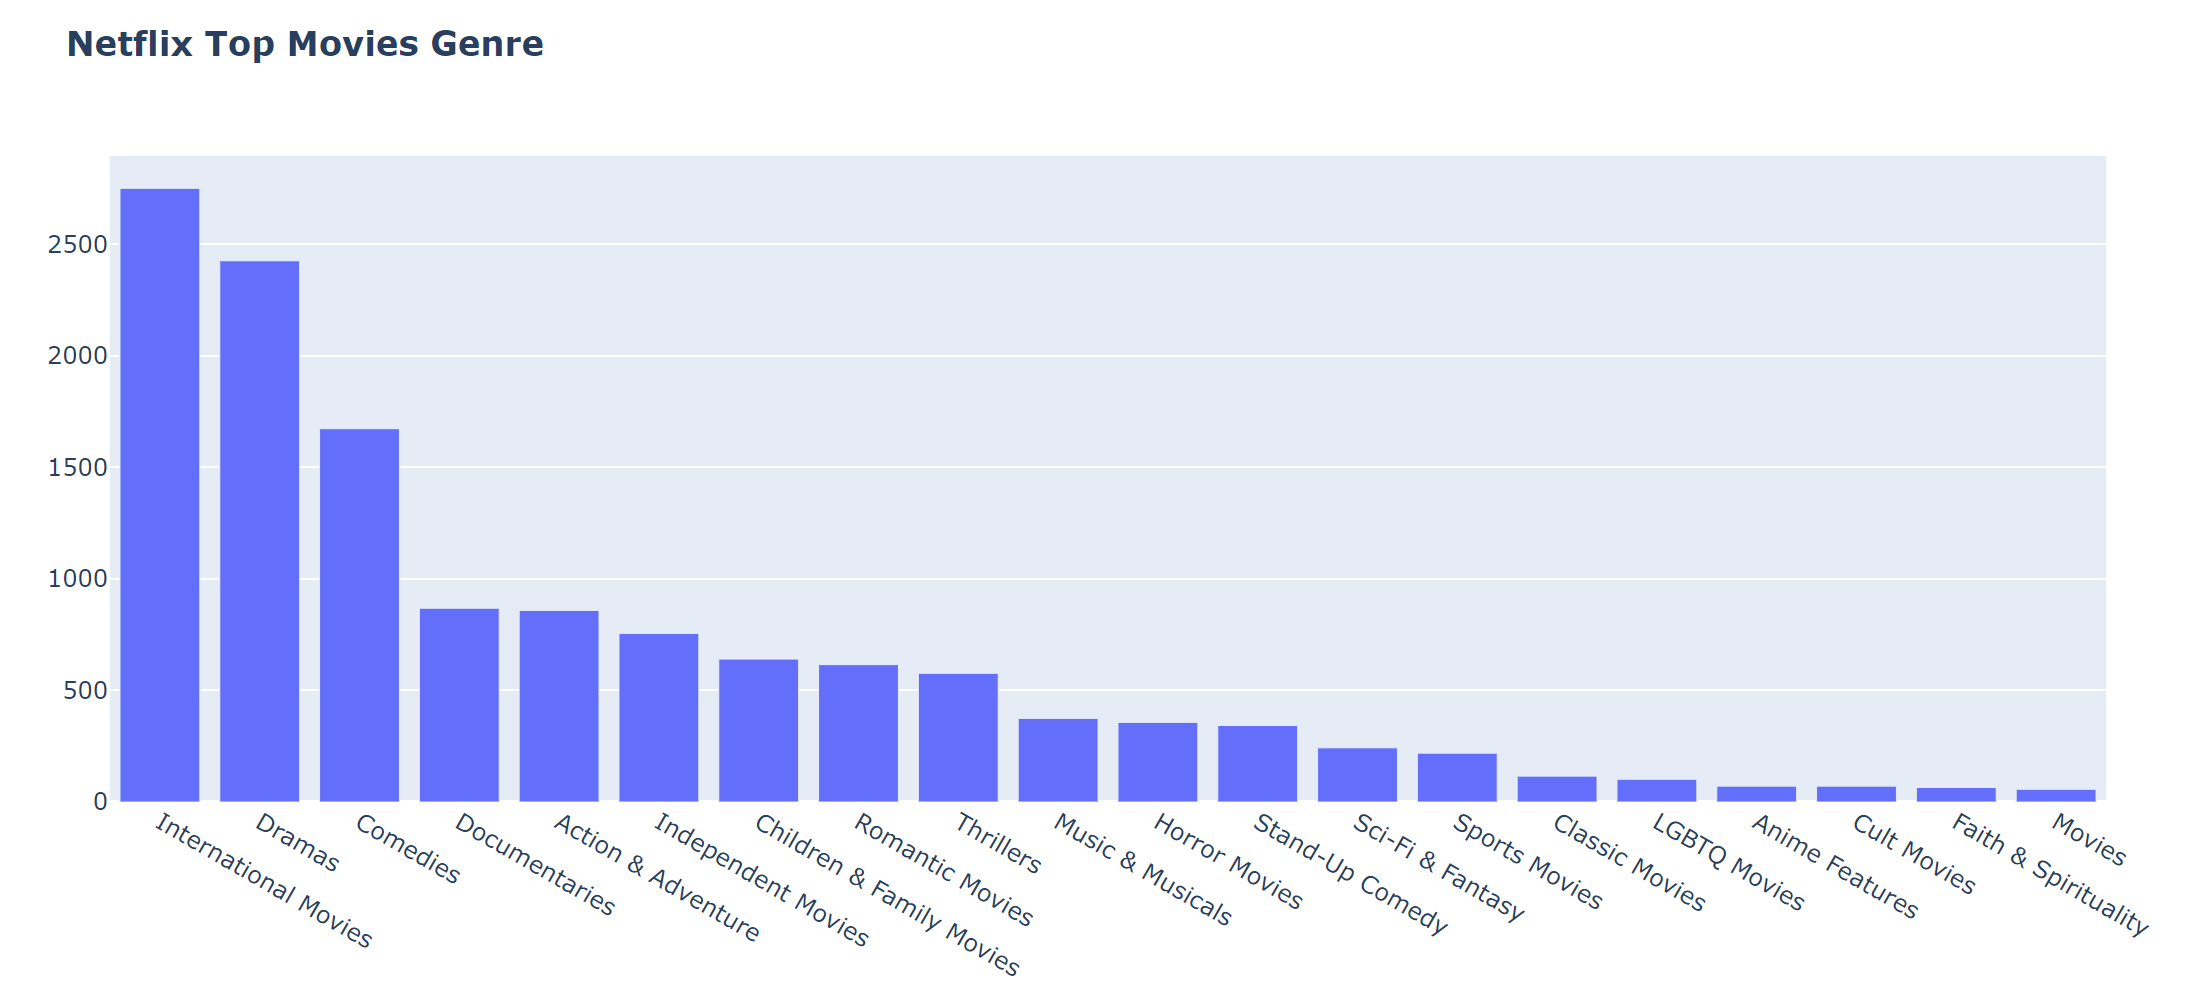

In [133]:
top_genres(disney_movie_df, title='Disney Top Movies Genre')

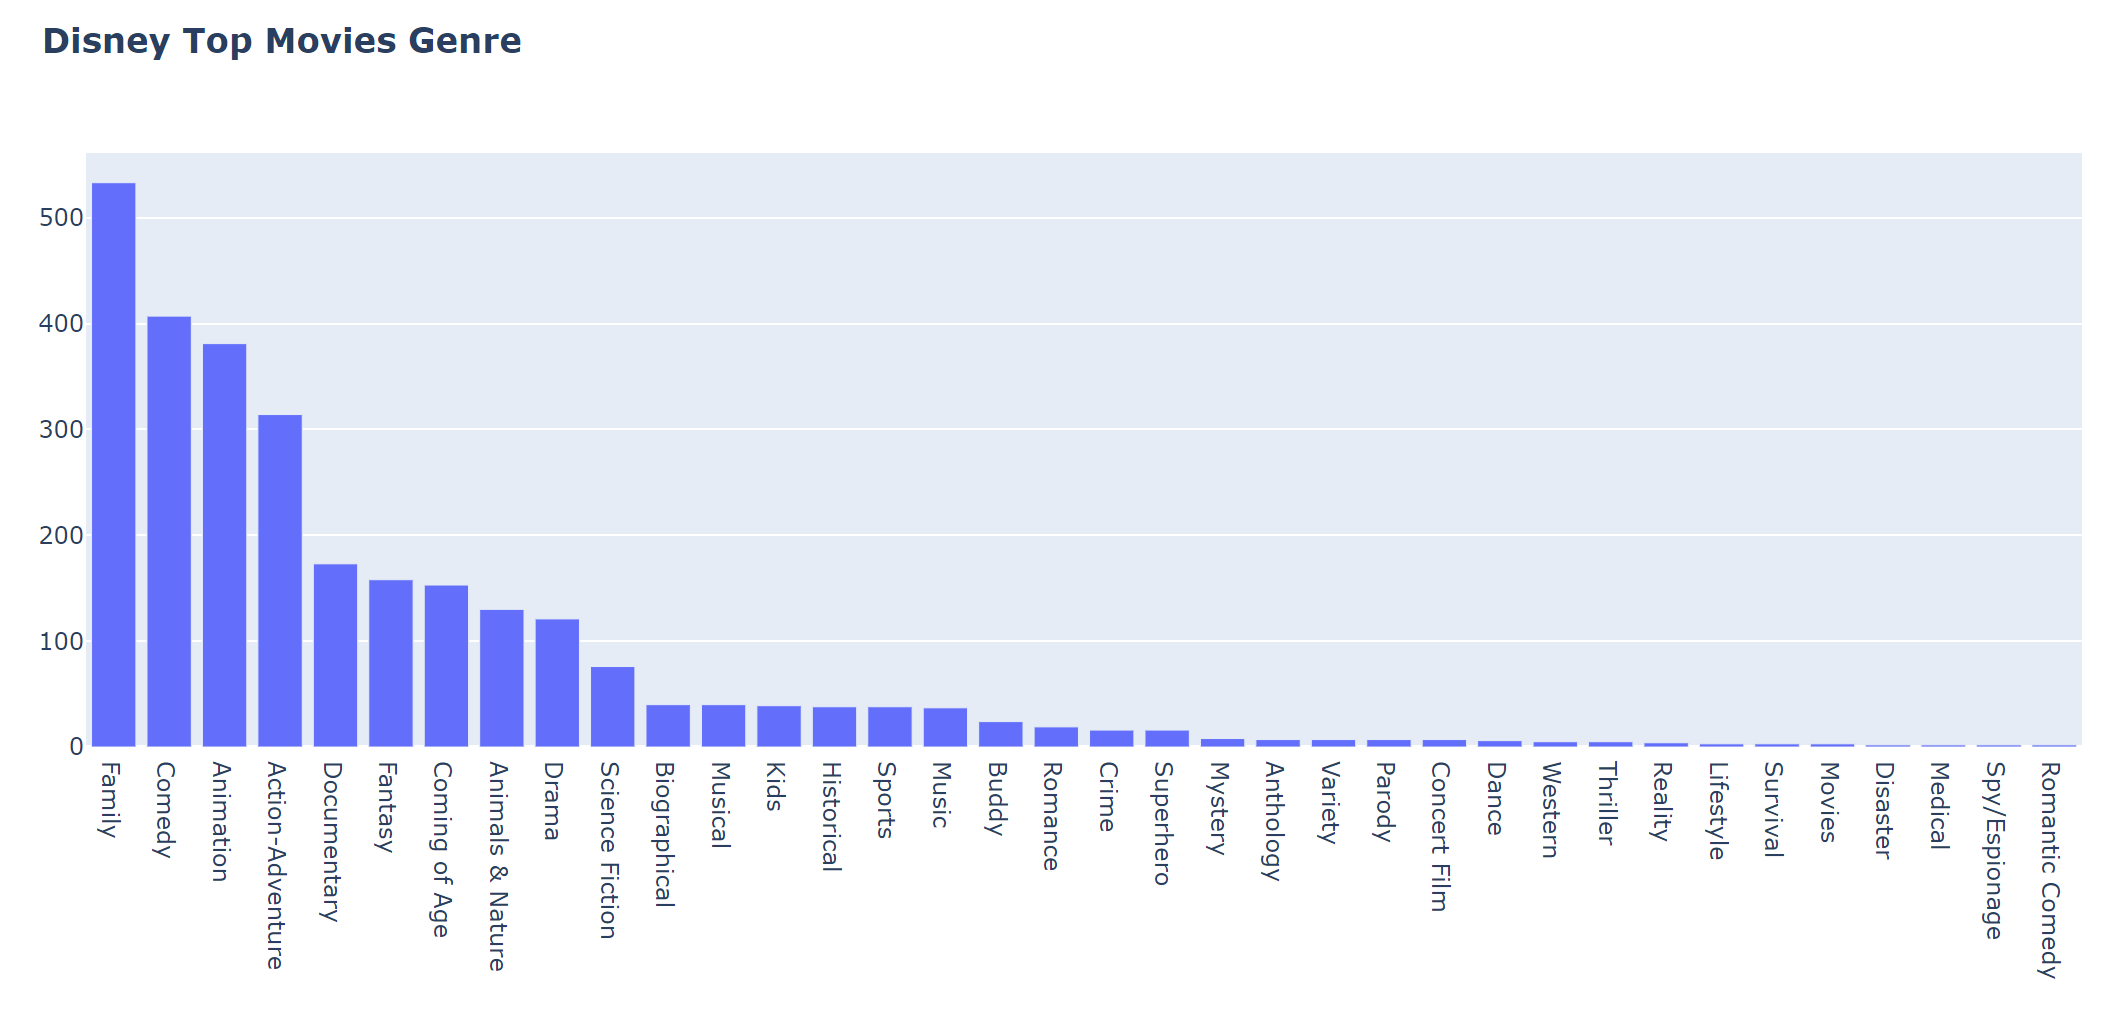

In [134]:
top_genres(netflix_show_df, title='Netflix Top Shows Genre')

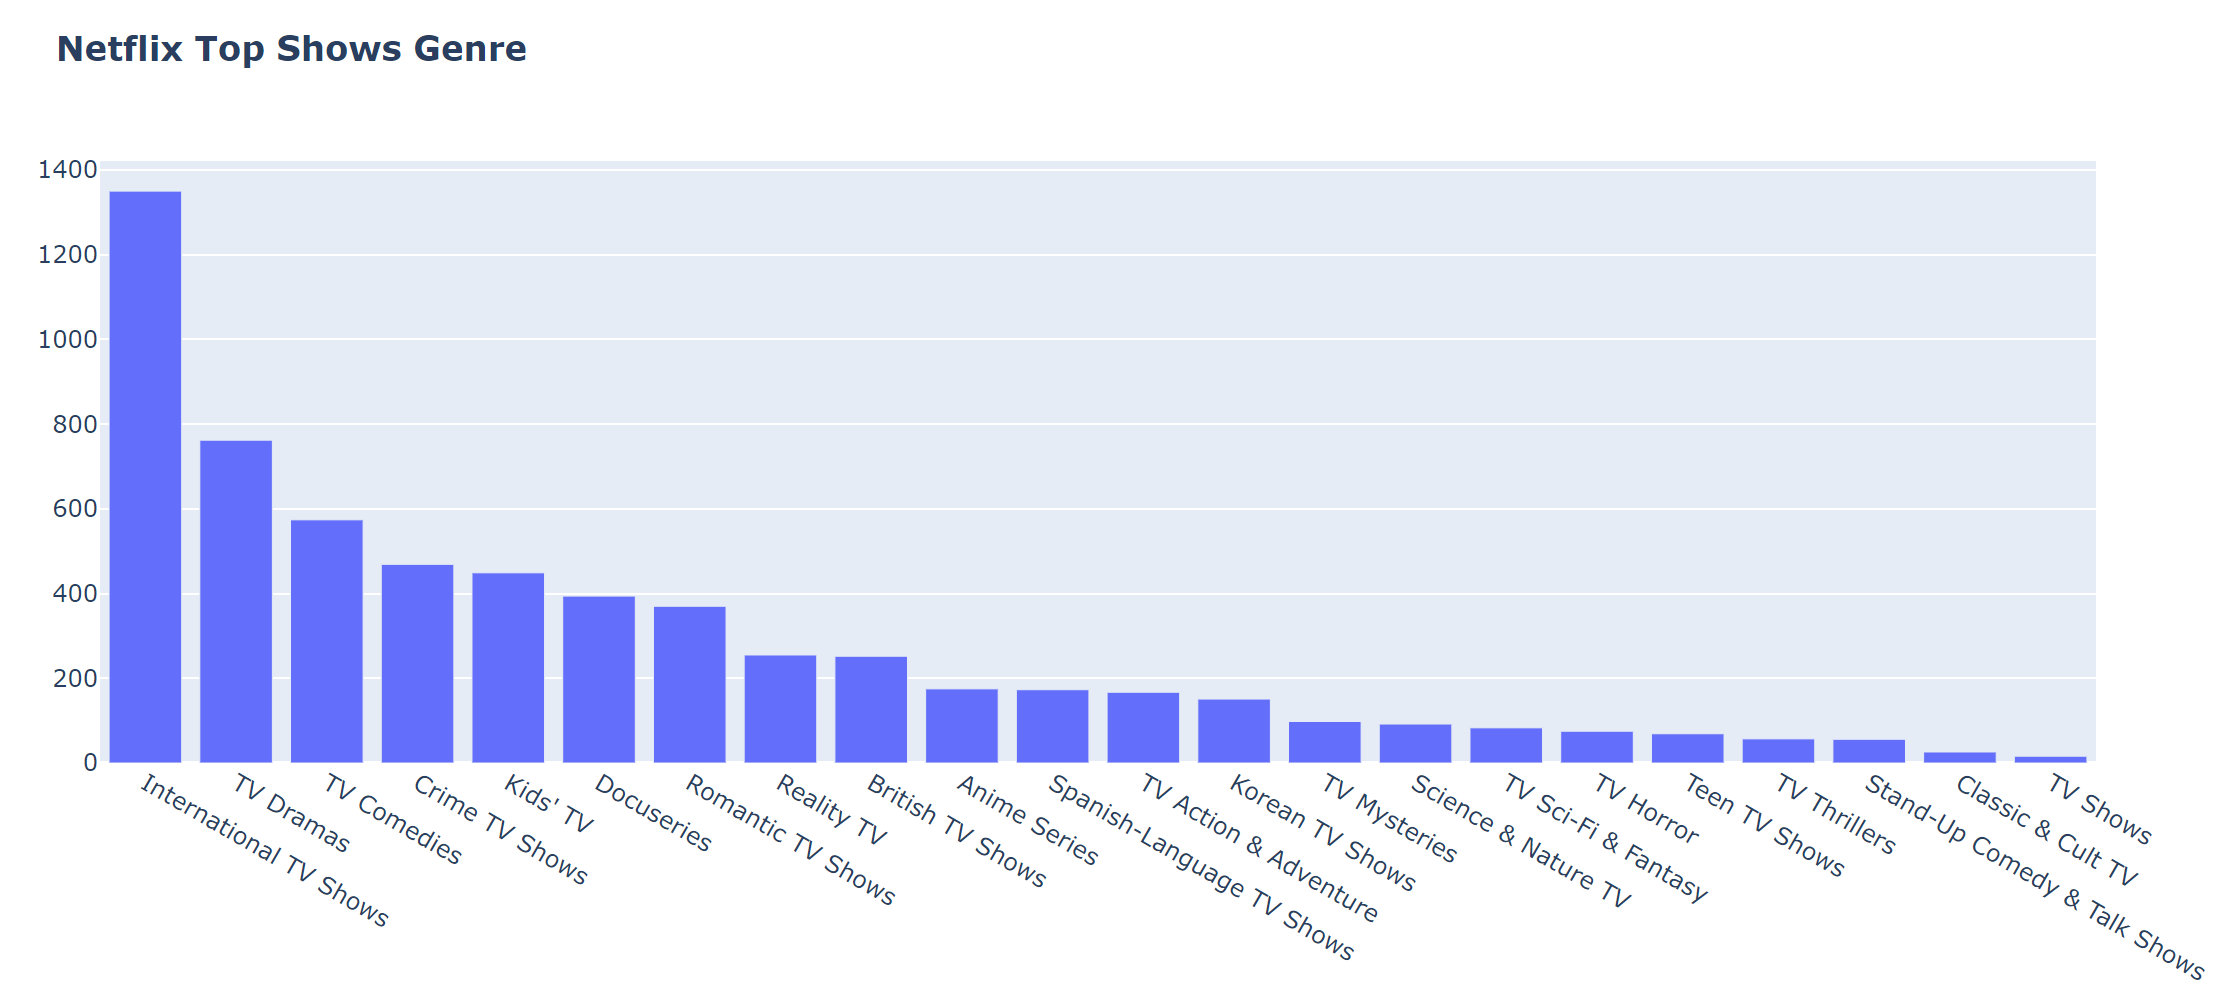

In [135]:
top_genres(disney_show_df, title='Disney Top Shows Genre')

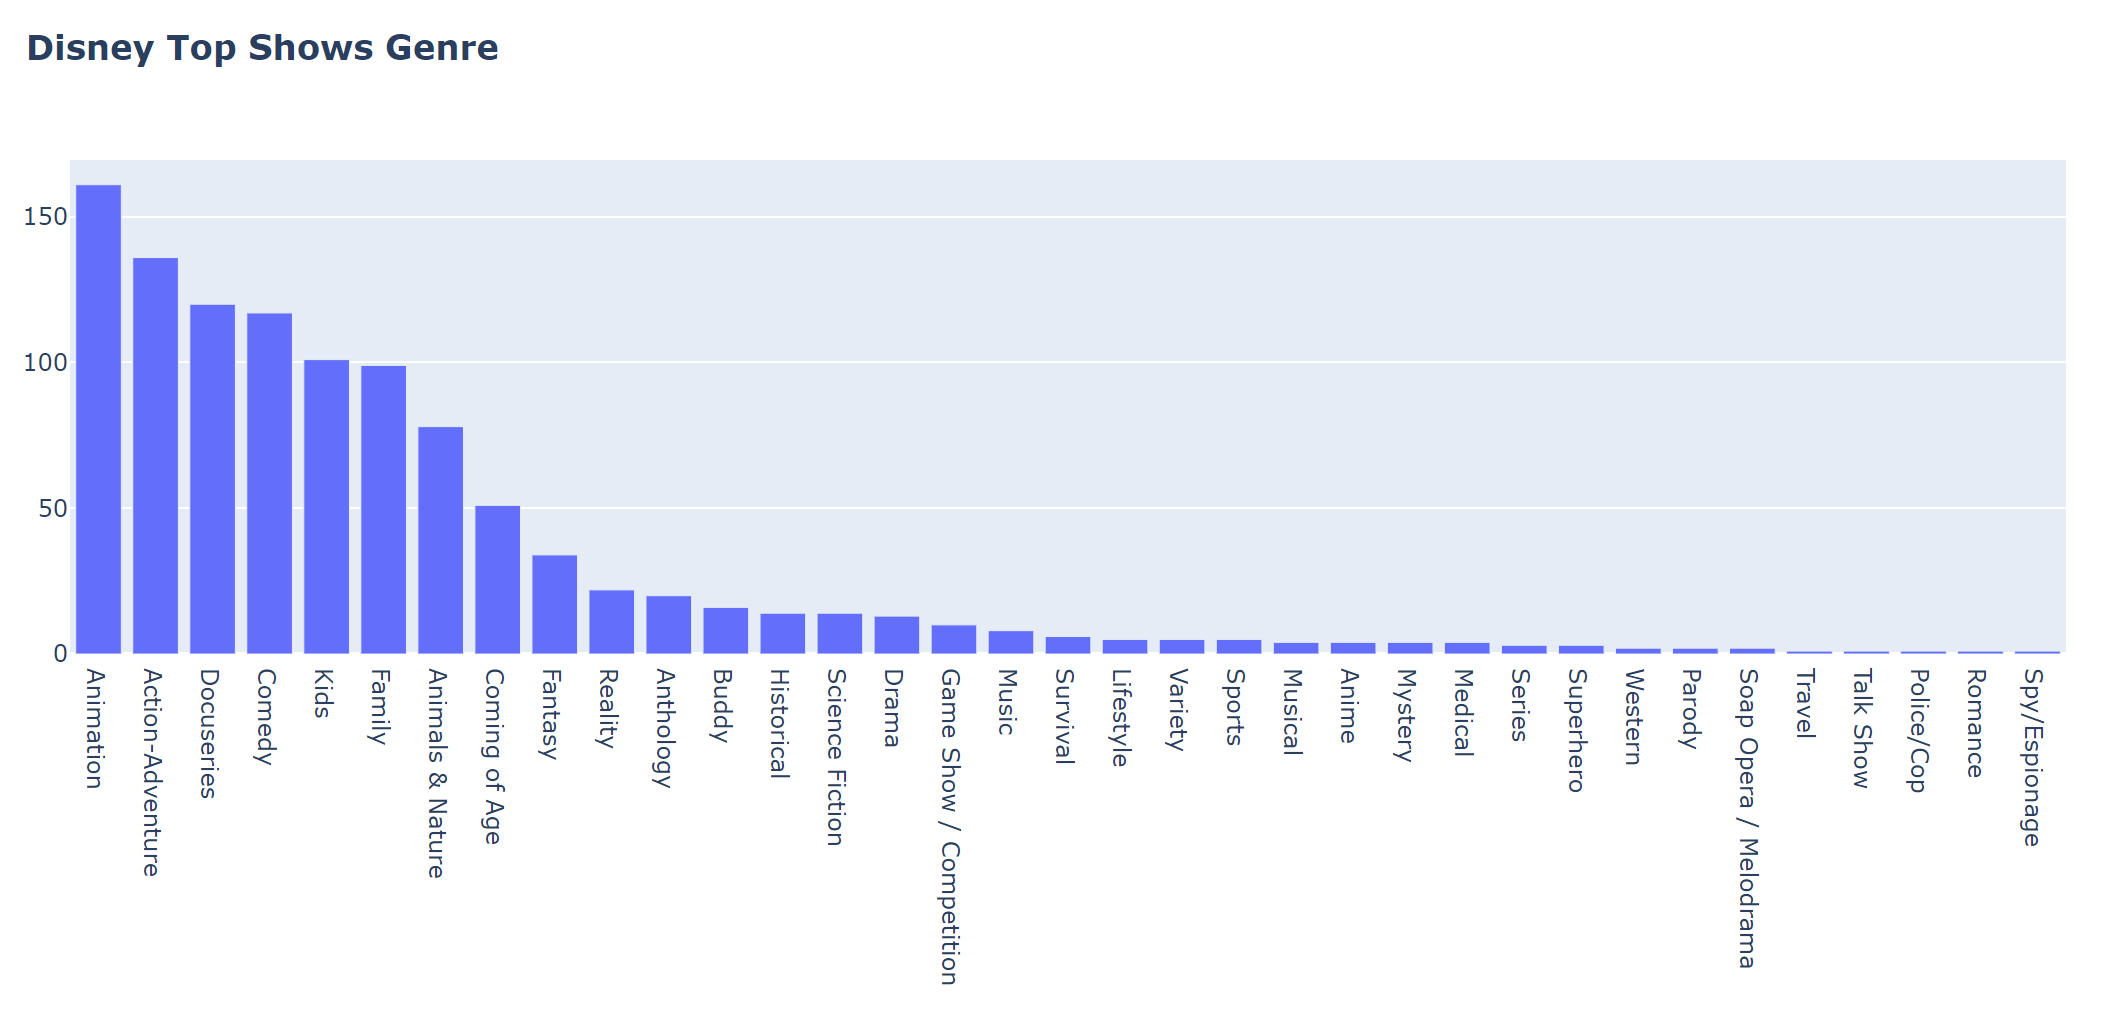

Netflix는 범용적이고 좀 더 어른적인 면을 띈다면<br>
Disney는 어린이들을 위한 가족을 위한 컨텐츠가 많이 보인다. + 애니메이션

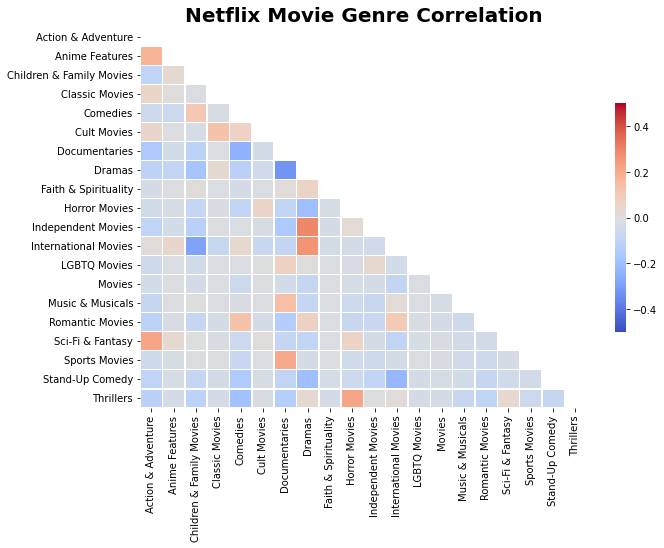

In [136]:
netflix_genres_df = calculate_mlb(netflix_movie_df['genre'])

movie_corr = netflix_genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Netflix Movie Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

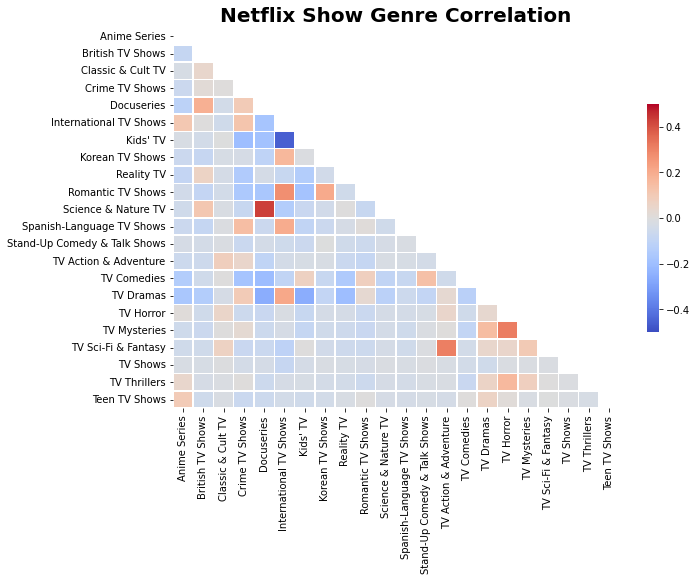

In [137]:
netflix_genres_df2 = calculate_mlb(netflix_show_df['genre'])

show_corr = netflix_genres_df2.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Netflix Show Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

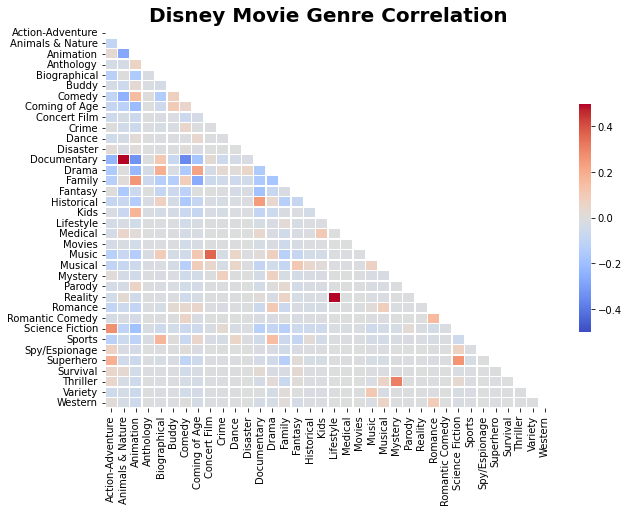

In [138]:
disney_genres_df = calculate_mlb(disney_movie_df['genre'])

movie_corr = disney_genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Disney Movie Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

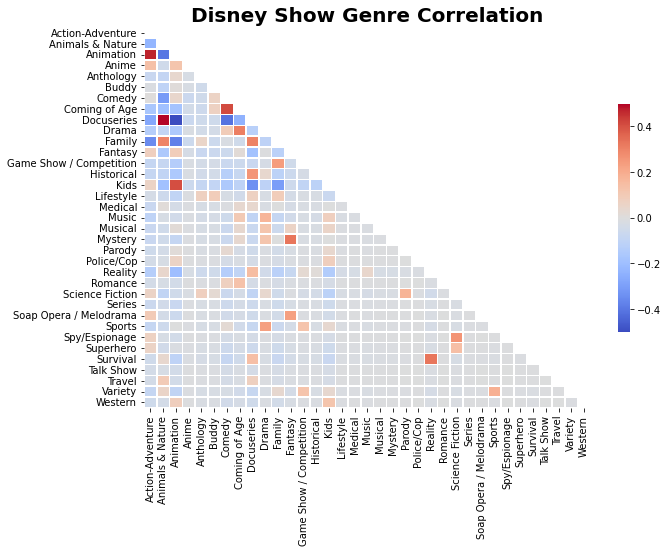

In [139]:
disney_genres_df2 = calculate_mlb(disney_show_df['genre'])

show_corr = disney_genres_df2.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Disney Show Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

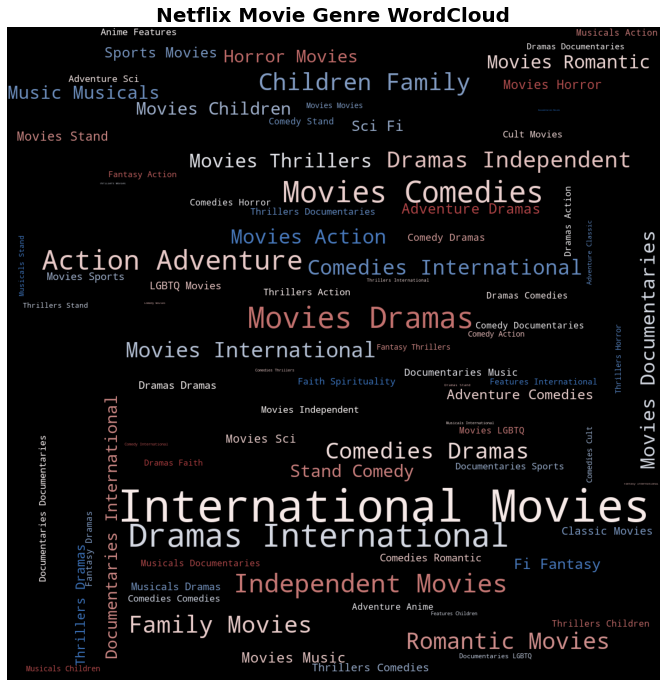

In [140]:
text = ' '.join(netflix_movie_df['listed_in'])

plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1200, height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Netflix Movie Genre WordCloud', fontsize=20, fontweight='bold')
plt.show()

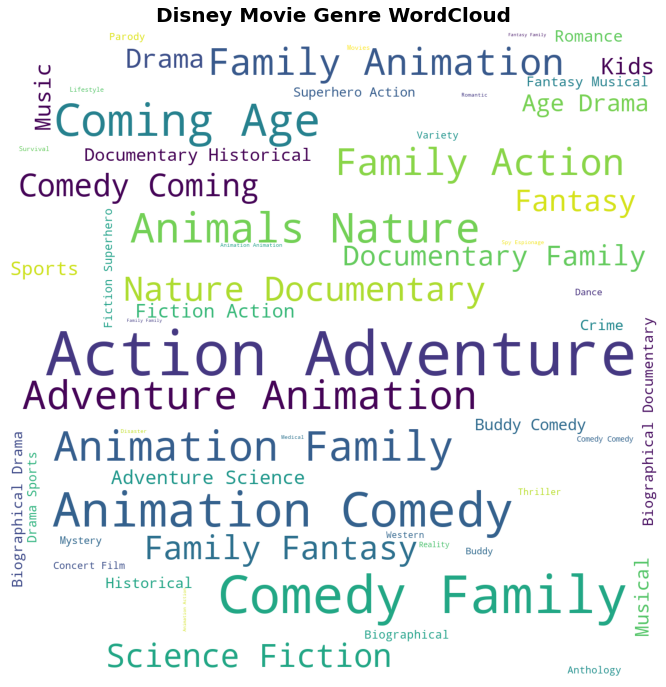

In [141]:
text = ' '.join(disney_movie_df['listed_in'])

plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Disney Movie Genre WordCloud', fontsize=20, fontweight='bold')
plt.show()

## 결론

Netflix가 더 나아보인다!

1. Netflix의 컨텐츠 수는 Disney 보다 약 6배 더 많다.
2. Netflix 는 아이부터 성인까지 영상물 등급이 다양하며 특히 성인용 컨텐츠 수가 많다. 하지만 Disney 는 최대 청소년 등급까지만 보유하고 있으며 대부분의 컨텐츠는 유아용 이다.
3. Netflix 는 다양한 나라의 컨텐츠를 보유하고 있다. 반면 Disney 는 미국에 몰려있다.
4. 영화의 경우 Disney 는 1시간 30분 미만의 비교적 짧은 영화의 비율이 높았지만 Netflix 는 1시간 30분에서 2시간 30분 사이의 영화 비율이 가장 높았다. 이는 Disney는 어린이 대상, Netflix는 성인 대상 컨텐츠 비율이 높기 때문이라고 볼 수 있다.
5. Netflix 장르는 굉장히 다양하다(드라마, 코미디, 범죄물, 수사물, 다큐 등 ). 반면 Disney 는 온 가족이 함께 볼 수 있는 장르로 분포되어 있다. (만화, 코미디, 동물 등)

# Recommended System

페르소나가 고른 컨텐츠와 비슷한 컨텐츠를 추천

- 콘텐츠 기반 추천 시스템을 적용

## Netflix 데이터에 IMDB 평점 컬럼 삽입

- 더 좋은 평점의 영화를 추천하기 위해서

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [3]:
df_ratings = pd.read_csv("/content/drive/MyDrive/Project/AIFFEL/Datathon/data/title.ratings.tsv",
                         sep="\t",low_memory=False, na_values=["\\N","nan"], usecols=["tconst","averageRating"])
df_ratings.head()

,tconst,averageRating
0,tt0000001,5.7
1,tt0000002,6.0
2,tt0000003,6.5
3,tt0000004,5.8
4,tt0000005,6.2


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221991 entries, 0 to 1221990
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1221991 non-null  object 
 1   averageRating  1221991 non-null  float64
dtypes: float64(1), object(1)
memory usage: 18.6+ MB


In [5]:
df_ratings.describe()

,averageRating
count,1.221991e+06
mean,6.924441e+00
std,1.391565e+00
min,1.000000e+00
25%,6.200000e+00
50%,7.100000e+00
75%,7.900000e+00
max,1.000000e+01


In [6]:
df_title_basics  = pd.read_csv("/content/drive/MyDrive/Project/AIFFEL/Datathon/data/title.basics.tsv",
                               sep="\t",low_memory=False, na_values=["\\N","nan"], usecols=["tconst", "primaryTitle"])
df_title_basics.head()

,tconst,primaryTitle
0,tt0000001,Carmencita
1,tt0000002,Le clown et ses chiens
2,tt0000003,Pauvre Pierrot
3,tt0000004,Un bon bock
4,tt0000005,Blacksmith Scene


In [7]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755374 entries, 0 to 8755373
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   tconst        object
 1   primaryTitle  object
dtypes: object(2)
memory usage: 133.6+ MB


In [8]:
rating = pd.merge(df_ratings, df_title_basics, how='inner', on='tconst')
rating

,tconst,averageRating,primaryTitle
0,tt0000001,5.7,Carmencita
1,tt0000002,6.0,Le clown et ses chiens
2,tt0000003,6.5,Pauvre Pierrot
3,tt0000004,5.8,Un bon bock
4,tt0000005,6.2,Blacksmith Scene
...,...,...,...
1221981,tt9916690,6.6,Horrid Henry Delivers the Milk
1221982,tt9916720,5.7,The Nun 2
1221983,tt9916730,8.4,6 Gunn
1221984,tt9916766,6.7,Episode #10.15


In [9]:
rating = pd.DataFrame({'title': rating.primaryTitle,
                       "Rating": rating.averageRating})
rating

,title,Rating
0,Carmencita,5.7
1,Le clown et ses chiens,6.0
2,Pauvre Pierrot,6.5
3,Un bon bock,5.8
4,Blacksmith Scene,6.2
...,...,...
1221981,Horrid Henry Delivers the Milk,6.6
1221982,The Nun 2,5.7
1221983,6 Gunn,8.4
1221984,Episode #10.15,6.7


In [17]:
df = pd.read_csv("/content/drive/MyDrive/Project/AIFFEL/Datathon/data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
df.loc[5541,'duration'] = '74 min' # placing '74 min' in 'duration'
df.loc[5541,'rating'] = np.nan # filling NaN into rating for the same row to later fix it

df.loc[5794,'duration'] = '84 min'
df.loc[5794,'rating'] = np.nan

df.loc[5813,'duration'] = '66 min'
df.loc[5813,'rating'] = np.nan

df = df[df['date_added'].notna()]

df['country'] = df['country'].fillna(df['country'].mode()[0])

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
target_ages     object
dtype: object

In [21]:
datajoin = pd.merge(df, rating, how = 'inner', on='title')
datajoin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,Rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,7.9
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,7.3
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,7.2
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,4.6
26830,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,6.0
26831,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,6.7
26832,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,6.1


In [23]:
datajoin = datajoin.drop_duplicates(subset=["title"])
datajoin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,Rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,7.9
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,7.2
7,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,6.7
8,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26805,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults,6.7
26813,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Older Kids,5.5
26814,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults,7.3
26819,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,7.8


In [24]:
# 6점 이상만 남깁니다.
orginal_data_size = len(datajoin)
datajoin = datajoin[datajoin['Rating']>=6]
filtered_data_size = len(datajoin)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 7027, filtered_data_size: 5017
Ratio of Remaining Data is 71.40%


In [32]:
datajoin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,Rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,7.9
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,7.2
7,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,6.7
8,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26804,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Adults,8.1
26805,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults,6.7
26814,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults,7.3
26819,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,7.8


## Persona

|이름|나이|직업|생활패턴|취향(장르)|취향(타입)|취향(나라)|취향(기타)|추천작품|
|--|--|--|--|--|--|--|--|--|
|프로펠러|30|양재 2기 아이펠러|빡빡한스케쥴로 시간이 많이 없음|액션, 스릴러|비교적 짧은 러닝타임 선호+시즌물|국뽕에 취한 토종 한국인|즉흥적|오징어게임(Squid Game)|
|이지안|23|대학생|대면 수업 듣는 통학러(통학시간이 너무 심심)|CSI 같은 수사물, 의학, 코미디|통학하면서 볼 수 있는 드라마|미국,영국|인기 높은 드라마, 고전물도 좋아함|에밀리, 파리에 가다(Emily in Paris)|
|김마미|40|주부|아이돌보기, 집안일|키즈, 로맨스|아이들이 빠져드는 컨텐츠|아이들이 좋아하면 그만|쉬고싶어...|퀸즈 컴뱃(The Queen's Gambit)|
|로오댕|56|조형예술가|하루종일 예술창작에 몰두, 가끔 쉼|예술 관련 다큐멘터리, 예술 영화|다큐멘터리|예술이라면!어디든|그저 예술!|앱스트랙트: 디자인의 미학(Abstract: The Art of Design)|

## Developing Recommendation Engine using cast, director, country, rating and genres

In [33]:
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
datajoin.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,Rating
type,,,,,,,,,,,,,
Movie,3328,3328,3267,3021,3328,3328,3328,3325,3328,3328,3328,3325,3328
TV Show,1689,1689,150,1480,1689,1689,1689,1687,1689,1689,1689,1687,1689


In [35]:
datajoin = datajoin.dropna(subset=['cast', 'country', 'rating'])

In [36]:
movies = datajoin[datajoin['type'] == 'Movie'].reset_index()
movies = movies.drop(['index', 'show_id', 'type', 'date_added', 'release_year', 'duration', 'description'], axis=1)
movies.head()

,title,director,cast,country,rating,listed_in,target_ages,Rating
0,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,PG,Children & Family Movies,Older Kids,6.9
1,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies",Adults,7.0
2,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,PG-13,"Comedies, Dramas",Teens,6.3
3,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",United States,TV-Y,Children & Family Movies,Kids,6.8
4,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,TV-14,"Comedies, International Movies, Romantic Movies",Teens,6.4


In [37]:
tv = datajoin[datajoin['type'] == 'TV Show'].reset_index()
tv = tv.drop(['index', 'show_id', 'type', 'date_added', 'release_year', 'duration', 'description'], axis=1)
tv.head()

,title,director,cast,country,rating,listed_in,target_ages,Rating
0,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Adults,7.9
1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Adults,7.2
2,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Adults,9.3
3,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,TV-MA,"TV Dramas, TV Horror, TV Mysteries",Adults,7.4
4,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,TV-14,"British TV Shows, Reality TV",Teens,8.6


In [38]:
actors = []

for i in movies['cast']:
    actor = re.split(r', \s*', i)
    actors.append(actor)
    
flat_list = []
for sublist in actors:
    for item in sublist:
        flat_list.append(item)
        
actors_list = sorted(set(flat_list))

binary_actors = [[0] * 0 for i in range(len(set(flat_list)))]

for i in movies['cast']:
    k = 0
    for j in actors_list:
        if j in i:
            binary_actors[k].append(1.0)
        else:
            binary_actors[k].append(0.0)
        k+=1
        
binary_actors = pd.DataFrame(binary_actors).transpose()
        
directors = []

for i in movies['director']:
    if pd.notna(i):
        director = re.split(r', \s*', i)
        directors.append(director)
    
flat_list2 = []
for sublist in directors:
    for item in sublist:
        flat_list2.append(item)
        
directors_list = sorted(set(flat_list2))

binary_directors = [[0] * 0 for i in range(len(set(flat_list2)))]

for i in movies['director']:
    k = 0
    for j in directors_list:
        if pd.isna(i):
            binary_directors[k].append(0.0)
        elif j in i:
            binary_directors[k].append(1.0)
        else:
            binary_directors[k].append(0.0)
        k+=1
        
binary_directors = pd.DataFrame(binary_directors).transpose()
        
countries = []

for i in movies['country']:
    country = re.split(r', \s*', i)
    countries.append(country)
    
flat_list3 = []
for sublist in countries:
    for item in sublist:
        flat_list3.append(item)
        
countries_list = sorted(set(flat_list3))

binary_countries = [[0] * 0 for i in range(len(set(flat_list3)))]

for i in movies['country']:
    k = 0
    for j in countries_list:
        if j in i:
            binary_countries[k].append(1.0)
        else:
            binary_countries[k].append(0.0)
        k+=1
        
binary_countries = pd.DataFrame(binary_countries).transpose()

genres = []

for i in movies['listed_in']:
    genre = re.split(r', \s*', i)
    genres.append(genre)
    
flat_list4 = []
for sublist in genres:
    for item in sublist:
        flat_list4.append(item)
        
genres_list = sorted(set(flat_list4))

binary_genres = [[0] * 0 for i in range(len(set(flat_list4)))]

for i in movies['listed_in']:
    k = 0
    for j in genres_list:
        if j in i:
            binary_genres[k].append(1.0)
        else:
            binary_genres[k].append(0.0)
        k+=1
        
binary_genres = pd.DataFrame(binary_genres).transpose()

ratings = []

for i in movies['rating']:
    ratings.append(i)

ratings_list = sorted(set(ratings))

binary_ratings = [[0] * 0 for i in range(len(set(ratings_list)))]

for i in movies['rating']:
    k = 0
    for j in ratings_list:
        if j in i:
            binary_ratings[k].append(1.0)
        else:
            binary_ratings[k].append(0.0)
        k+=1
        
binary_ratings = pd.DataFrame(binary_ratings).transpose()

In [39]:
binary = pd.concat([binary_actors, binary_directors, binary_countries, binary_genres], axis=1,ignore_index=True)
binary

,0,1,2,3,4,5,6,7,8,9,...,18481,18482,18483,18484,18485,18486,18487,18488,18489,18490
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
actors2 = []

for i in tv['cast']:
    actor2 = re.split(r', \s*', i)
    actors2.append(actor2)
    
flat_list5 = []
for sublist in actors2:
    for item in sublist:
        flat_list5.append(item)
        
actors_list2 = sorted(set(flat_list5))

binary_actors2 = [[0] * 0 for i in range(len(set(flat_list5)))]

for i in tv['cast']:
    k = 0
    for j in actors_list2:
        if j in i:
            binary_actors2[k].append(1.0)
        else:
            binary_actors2[k].append(0.0)
        k+=1
        
binary_actors2 = pd.DataFrame(binary_actors2).transpose()
        

countries2 = []

for i in tv['country']:
    country2 = re.split(r', \s*', i)
    countries2.append(country2)
    
flat_list6 = []
for sublist in countries2:
    for item in sublist:
        flat_list6.append(item)
        
countries_list2 = sorted(set(flat_list6))

binary_countries2 = [[0] * 0 for i in range(len(set(flat_list6)))]

for i in tv['country']:
    k = 0
    for j in countries_list2:
        if j in i:
            binary_countries2[k].append(1.0)
        else:
            binary_countries2[k].append(0.0)
        k+=1
        
binary_countries2 = pd.DataFrame(binary_countries2).transpose()

genres2 = []

for i in tv['listed_in']:
    genre2 = re.split(r', \s*', i)
    genres2.append(genre2)
    
flat_list7 = []
for sublist in genres2:
    for item in sublist:
        flat_list7.append(item)
        
genres_list2 = sorted(set(flat_list7))

binary_genres2 = [[0] * 0 for i in range(len(set(flat_list7)))]

for i in tv['listed_in']:
    k = 0
    for j in genres_list2:
        if j in i:
            binary_genres2[k].append(1.0)
        else:
            binary_genres2[k].append(0.0)
        k+=1
        
binary_genres2 = pd.DataFrame(binary_genres2).transpose()

ratings2 = []

for i in tv['rating']:
    ratings2.append(i)

ratings_list2 = sorted(set(ratings2))

binary_ratings2 = [[0] * 0 for i in range(len(set(ratings_list2)))]

for i in tv['rating']:
    k = 0
    for j in ratings_list2:
        if j in i:
            binary_ratings2[k].append(1.0)
        else:
            binary_ratings2[k].append(0.0)
        k+=1
        
binary_ratings2 = pd.DataFrame(binary_ratings2).transpose()

In [41]:
binary2 = pd.concat([binary_actors2, binary_countries2, binary_genres2], axis=1, ignore_index=True)
binary2

,0,1,2,3,4,5,6,7,8,9,...,10593,10594,10595,10596,10597,10598,10599,10600,10601,10602
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def recommender(search):
    cs_list = []
    binary_list = []
    if search in movies['title'].values:
        idx = movies[movies['title'] == search].index.item()
        for i in binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        for j in range(len(movies)):
            binary_list2 = []
            for k in binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        movies_copy = movies.copy()
        movies_copy['cos_sim'] = cs_list
        results = movies_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    elif search in tv['title'].values:
        idx = tv[tv['title'] == search].index.item()
        for i in binary2.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]
        for j in range(len(tv)):
            binary_list2 = []
            for k in binary2.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        tv_copy = tv.copy()
        tv_copy['cos_sim'] = cs_list
        results = tv_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    else:
        return("Title not in dataset. Please check spelling.")

In [158]:
# 영화 제목 키워드로 검색
movies[movies['title'].str.lower().str.contains('queen', regex=False)]

,title,director,cast,country,rating,listed_in,target_ages,Rating
185,The Queen,Stephen Frears,"Helen Mirren, Michael Sheen, James Cromwell, H...","United Kingdom, United States, France, Italy",PG-13,"Dramas, International Movies",Teens,7.3
713,Queen,Vikas Bahl,"Kangana Ranaut, Rajkummar Rao, Lisa Haydon, Mi...",India,TV-MA,"Comedies, Dramas, International Movies",Adults,7.6
751,The Show Must Go On: The Queen + Adam Lambert ...,NaN,"Adam Lambert, Brian May, Roger Taylor","United Kingdom, United States",TV-MA,"Documentaries, Music & Musicals",Adults,7.8


In [156]:
# TV-show 제목 키워드로 검색
tv[tv['title'].str.lower().str.contains('emily in paris', regex=False)]

,title,director,cast,country,rating,listed_in,target_ages,Rating
366,Emily in Paris,NaN,"Lily Collins, Philippine Leroy-Beaulieu, Ashle...",United States,TV-MA,"Romantic TV Shows, TV Comedies, TV Dramas",Adults,7.2


In [51]:
# 프로펠러
recommender('Squid Game')

,title,director,cast,country,rating,listed_in,target_ages,Rating,cos_sim
767,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",United States,TV-MA,"International TV Shows, TV Dramas, TV Thrillers",Adults,7.2,0.485071
153,Elite Short Stories: Guzmán Caye Rebe,NaN,"Miguel Bernardeau, Claudia Salas, Georgina Amorós",United States,TV-MA,"International TV Shows, Spanish-Language TV Sh...",Adults,7.5,0.404226
31,The Ingenuity of the Househusband,NaN,Kenjiro Tsuda,United States,TV-G,"International TV Shows, TV Comedies",Kids,6.8,0.396059
1262,Fit for Fashion,NaN,Louise Roe,United States,TV-14,"International TV Shows, Reality TV",Teens,6.1,0.396059
44,Korean Cold Noodle Rhapsody,NaN,Paik Jong-won,United States,TV-PG,"Docuseries, International TV Shows",Older Kids,7.4,0.396059


In [157]:
# 이지안
recommender('Emily in Paris')

,title,director,cast,country,rating,listed_in,target_ages,Rating,cos_sim
957,Hot Date,NaN,"Emily Axford, Brian Murphy",United States,TV-MA,"Romantic TV Shows, TV Comedies",Adults,7.1,0.505076
1272,Get Shorty,NaN,"Ray Romano, Chris O'Dowd",United States,TV-MA,"Crime TV Shows, TV Comedies, TV Dramas",Adults,6.9,0.472456
122,Sex/Life,NaN,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ...",United States,TV-MA,"Romantic TV Shows, TV Dramas",Adults,7.3,0.445435
31,The Ingenuity of the Househusband,NaN,Kenjiro Tsuda,United States,TV-G,"International TV Shows, TV Comedies",Kids,6.8,0.436436
126,Too Hot to Handle,NaN,Desiree Burch,United States,TV-MA,"Reality TV, Romantic TV Shows",Adults,6.7,0.436436


In [150]:
# 김마미
recommender("The Queen's Gambit")

,title,director,cast,country,rating,listed_in,target_ages,Rating,cos_sim
1001,Life Sentence,NaN,Lucy Hale,United States,TV-14,TV Dramas,Teens,7.3,0.387298
1285,Highway to Heaven,NaN,"Michael Landon, Victor French",United States,TV-PG,TV Dramas,Older Kids,6.8,0.346410
1059,Godless,NaN,"Jeff Daniels, Michelle Dockery, Jack O'Connell...",United States,TV-MA,TV Dramas,Adults,7.3,0.311400
317,Heart & Soul,NaN,"Anthony Monjaro, Phoenix Ezendu, Ademola Amoo,...",United States,TV-14,"International TV Shows, TV Dramas",Teens,7.9,0.298142
1278,Happyish,NaN,"Steve Coogan, Kathryn Hahn, Sawyer Shipman, Br...",United States,TV-MA,"TV Comedies, TV Dramas",Adults,7.2,0.273861


In [148]:
# 로오댕
recommender('Abstract: The Art of Design')

,title,director,cast,country,rating,listed_in,target_ages,Rating,cos_sim
84,How to Become a Tyrant,NaN,Peter Dinklage,United States,TV-MA,Docuseries,Adults,7.4,0.452267
1204,America's Book of Secrets,NaN,Jonathan Adams,United States,TV-14,Docuseries,Teens,6.8,0.452267
445,The Business of Drugs,NaN,Amaryllis Fox,United States,TV-MA,Docuseries,Adults,7.2,0.452267
950,Salt Fat Acid Heat,NaN,Samin Nosrat,United States,TV-PG,Docuseries,Older Kids,7.7,0.452267
1441,The Story of God with Morgan Freeman,NaN,Morgan Freeman,United States,TV-14,Docuseries,Teens,7.8,0.452267
